# 1. Setup & Imports

In [1]:
!pip install pandas matplotlib seaborn scipy openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Core packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
from scipy import stats

# Settings
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

# 2. Load Data

### purchase behaviour

In [3]:
# Load purchase behaviour
purchase_behaviour = pd.read_csv("QVI_purchase_behaviour.csv")

# Preview
print(f"Purchase Behaviour Shape is: {purchase_behaviour.shape}")
display(purchase_behaviour.head())

Purchase Behaviour Shape is: (72637, 3)


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


### transaction data

In [4]:
# Load transaction data
transaction_data = pd.read_excel("QVI_transaction_data.xlsx")

# Preview
print(f"Transaction Data Shape is: {transaction_data.shape}")
display(transaction_data.head())

Transaction Data Shape is: (264836, 8)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# 3. Data Understanding

- purchase_behaviour: contains LYLTY_CARD_NBR, LIFESTAGE, PREMIUM_CUSTOMER

- transaction_data: contains LYLTY_CARD_NBR, DATE, PROD_NAME, PROD_QTY, TOT_SALES, STORE_NBR

In [5]:
display("Data Shape:", purchase_behaviour.shape)
display("\nData Types:\n", purchase_behaviour.dtypes)
display("\nMissing Values:\n", purchase_behaviour.isnull().sum())
display("\nUnique Values per Column:\n", purchase_behaviour.nunique())
display("\nStatistical Summary:\n", purchase_behaviour.describe(include='all'))

'Data Shape:'

(72637, 3)

'\nData Types:\n'

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

'\nMissing Values:\n'

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

'\nUnique Values per Column:\n'

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

'\nStatistical Summary:\n'

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [6]:
display("Data Shape:", transaction_data.shape)
display("\nData Types:\n", transaction_data.dtypes)
display("\nMissing Values:\n", transaction_data.isnull().sum())
display("\nUnique Values per Column:\n", transaction_data.nunique())
display("\nStatistical Summary:\n", transaction_data.describe(include='all'))

'Data Shape:'

(264836, 8)

'\nData Types:\n'

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

'\nMissing Values:\n'

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

'\nUnique Values per Column:\n'

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

'\nStatistical Summary:\n'

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,NaN,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,NaN,2.000000,9.200000


In [7]:
print(purchase_behaviour.duplicated().sum())
print(transaction_data.duplicated().sum())

0
1


In [8]:
transaction_data.drop_duplicates(inplace=True)

In [9]:
print(purchase_behaviour.duplicated().sum())
print(transaction_data.duplicated().sum())

0
0


In [10]:
print("Purchase Behaviour")
purchase_behaviour.info()

purchase_behaviour.describe(include="all")

Purchase Behaviour
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [11]:
print("Transaction Data")
transaction_data.info()

transaction_data.describe()

Transaction Data
<class 'pandas.core.frame.DataFrame'>
Index: 264835 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264835 non-null  int64  
 1   STORE_NBR       264835 non-null  int64  
 2   LYLTY_CARD_NBR  264835 non-null  int64  
 3   TXN_ID          264835 non-null  int64  
 4   PROD_NBR        264835 non-null  int64  
 5   PROD_NAME       264835 non-null  object 
 6   PROD_QTY        264835 non-null  int64  
 7   TOT_SALES       264835 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 18.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,43464.036600,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,105.389336,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


# 4. Data Cleaning

- Fix date column format

- Check for missing values

- Detect & remove outliers (e.g., extremely high PROD_QTY)

- Create new features:

     - Pack_Size

     - Brand

In [12]:
# Convert DATE to datetime
transaction_data["DATE"] = pd.to_datetime(transaction_data["DATE"], unit='D', origin='1899-12-30')
transaction_data.info()
display(transaction_data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 264835 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264835 non-null  datetime64[ns]
 1   STORE_NBR       264835 non-null  int64         
 2   LYLTY_CARD_NBR  264835 non-null  int64         
 3   TXN_ID          264835 non-null  int64         
 4   PROD_NBR        264835 non-null  int64         
 5   PROD_NAME       264835 non-null  object        
 6   PROD_QTY        264835 non-null  int64         
 7   TOT_SALES       264835 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 18.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [13]:
# Missing values
print("Missing Values for Purchase Behaviour:")
print(purchase_behaviour.isnull().sum())

print("\nMissing Values for Transaction Data:")
print(transaction_data.isnull().sum())

Missing Values for Purchase Behaviour:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Missing Values for Transaction Data:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


Before Cleaning:


,PROD_QTY,TOT_SALES
count,264835.000000,264835.000000
mean,1.907308,7.304205
std,0.643655,3.083231
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,200.000000,650.000000


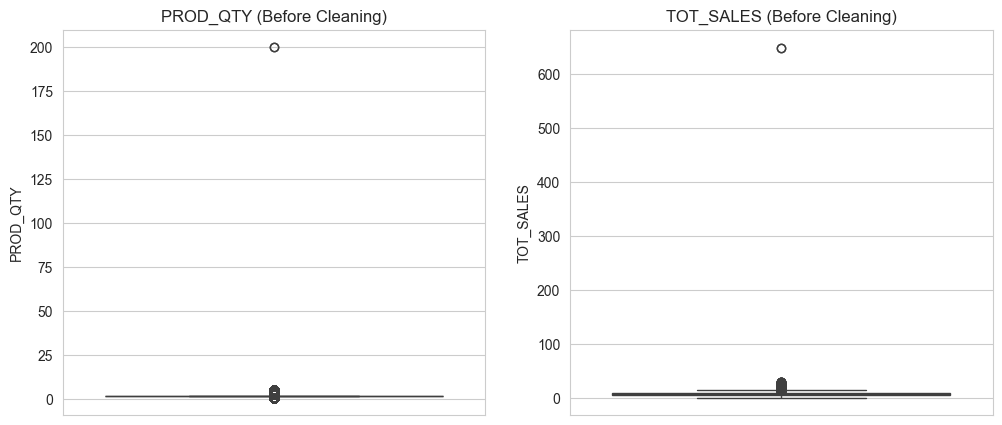

In [14]:
# -----------------------------
# Outlier Detection & Removal
# -----------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# --- Before Cleaning ---
print("Before Cleaning:")
display(transaction_data[["PROD_QTY", "TOT_SALES"]].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=transaction_data["PROD_QTY"])
plt.title("PROD_QTY (Before Cleaning)")

plt.subplot(1, 2, 2)
sns.boxplot(y=transaction_data["TOT_SALES"])
plt.title("TOT_SALES (Before Cleaning)")
plt.show()

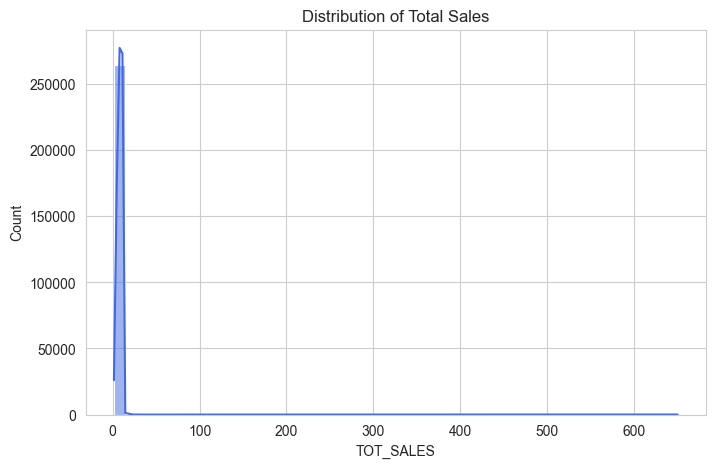

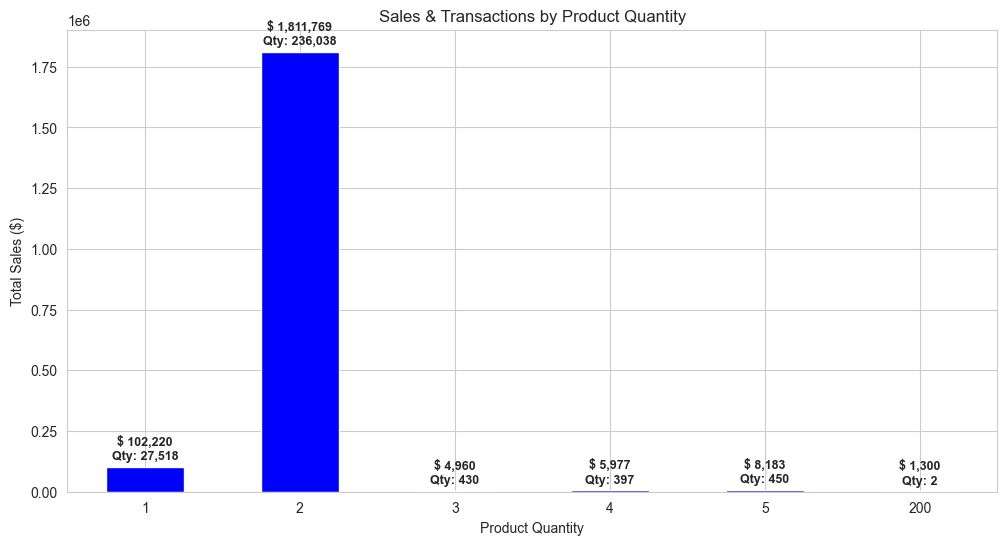

Average Chips per Transaction: 1.82


In [15]:
# -----------------------------
# 2. Transaction Insights
# -----------------------------
# Distribution of total sales
transaction_data["TOT_SALES"] = transaction_data["TOT_SALES"].astype(float)
plt.figure(figsize=(8,5))
sns.histplot(transaction_data['TOT_SALES'], bins=50, kde=True, color="royalblue")
plt.title("Distribution of Total Sales")
plt.show()


# Aggregate sales & quantities by product quantity ranges
qty_stats = transaction_data.groupby("PROD_QTY").agg(
    Total_Sales=("TOT_SALES", "sum"),
    Total_Qty=("PROD_QTY", "count")   # count of transactions with that quantity
)

# Plot chart
plt.figure(figsize=(12,6))
ax = qty_stats["Total_Sales"].plot(kind="bar", color="blue", rot=0)

plt.title("Sales & Transactions by Product Quantity")
plt.xlabel("Product Quantity")
plt.ylabel("Total Sales ($)")

# Add labels with sales and quantity
for i, (sales, qty) in enumerate(zip(qty_stats["Total_Sales"], qty_stats["Total_Qty"])):
    ax.text(
        i, sales + (0.01 * qty_stats["Total_Sales"].max()),
        f"$ {sales:,.0f}\nQty: {qty:,}",   # $ for sales + Qty count
        ha='center', va='bottom', fontsize=9, fontweight='bold'
    )

plt.show()

# Average chips per transaction
avg_qty = transaction_data.groupby("LYLTY_CARD_NBR")["PROD_QTY"].mean().mean()
print(f"Average Chips per Transaction: {avg_qty:.2f}")


In [16]:
transaction_data[transaction_data["PROD_QTY"] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [17]:
transaction_data[transaction_data["TOT_SALES"] == 650]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [18]:
transaction_data[transaction_data["LYLTY_CARD_NBR"] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [19]:
# Filter suspicious customer
important_customer = transaction_data[(transaction_data["STORE_NBR"] == 226) & (transaction_data["LYLTY_CARD_NBR"] == 226000)]

# Save to CSV
important_customer.to_csv("Saved_Data/important_customer.csv", index=False)

print("Important customer data saved successfully!")


Important customer data saved successfully!


In [20]:
# --- Outlier Removal Rules ---
# Most transactions are for 1–5 packs, so let's filter extreme values
cleaned_data = transaction_data[(transaction_data["PROD_QTY"] < 200) & 
                                (transaction_data["TOT_SALES"] < 650)]


After Cleaning:
            PROD_QTY      TOT_SALES
count  264833.000000  264833.000000
mean        1.905812       7.299351
std         0.343437       2.527244
min         1.000000       1.500000
25%         2.000000       5.400000
50%         2.000000       7.400000
75%         2.000000       9.200000
max         5.000000      29.500000


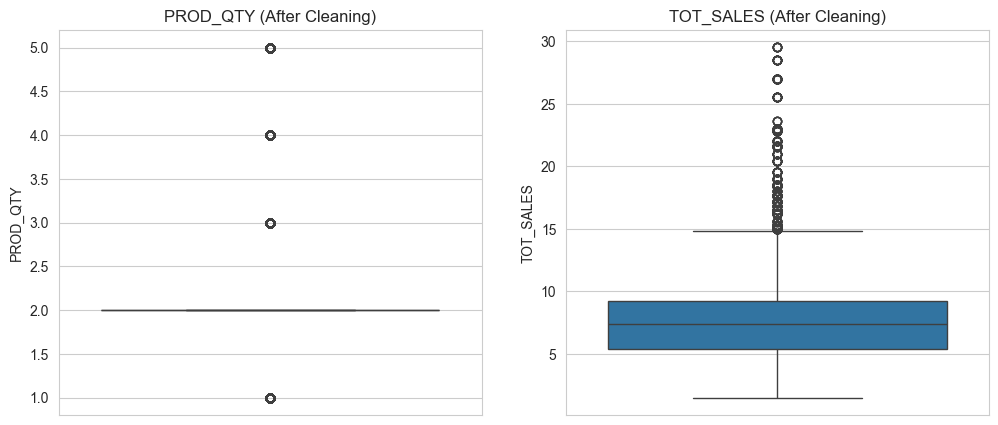

In [21]:
# --- After Cleaning ---
print("\nAfter Cleaning:")
print(cleaned_data[["PROD_QTY", "TOT_SALES"]].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=cleaned_data["PROD_QTY"])
plt.title("PROD_QTY (After Cleaning)")

plt.subplot(1, 2, 2)
sns.boxplot(y=cleaned_data["TOT_SALES"])
plt.title("TOT_SALES (After Cleaning)")
plt.show()

# Replace old transaction_data with cleaned version for next steps
transaction_data = cleaned_data.copy()

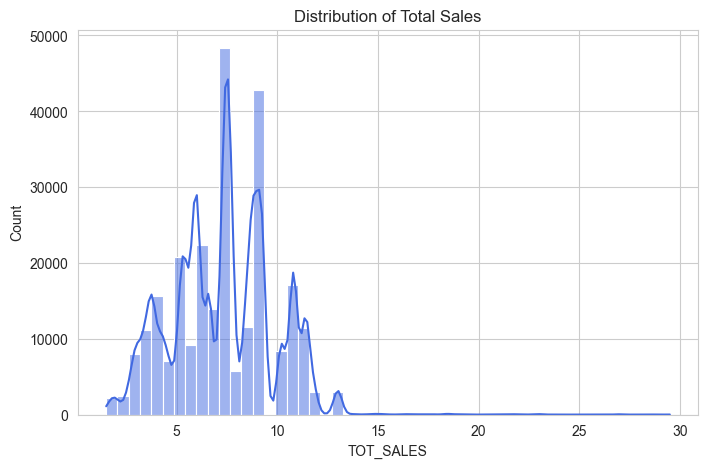

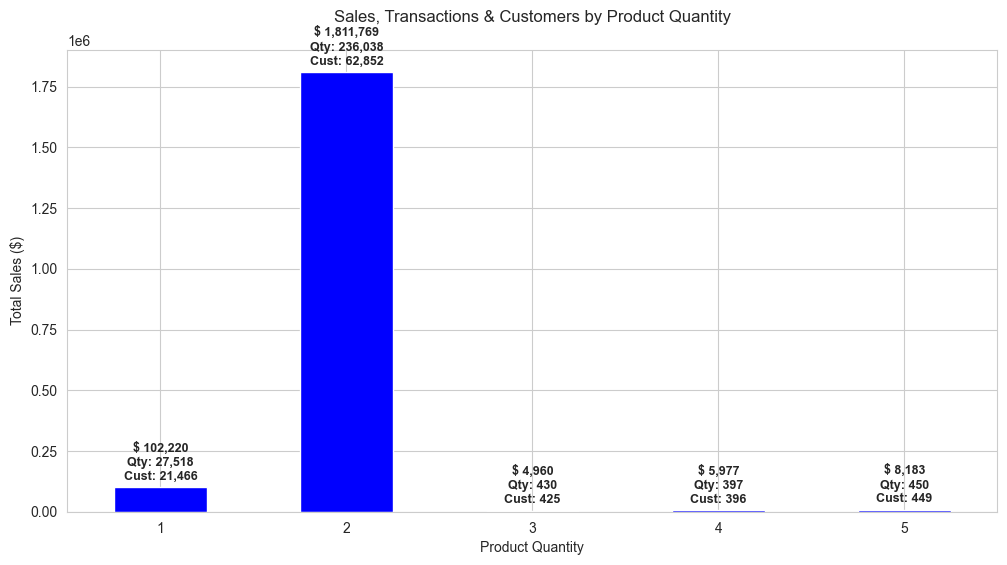

Average Chips per Transaction: 1.82
Total Unique Customers: 72,636


In [22]:
# -----------------------------
# 2. Transaction Insights
# -----------------------------
# Distribution of total sales
transaction_data["TOT_SALES"] = transaction_data["TOT_SALES"].astype(float)
plt.figure(figsize=(8,5))
sns.histplot(transaction_data['TOT_SALES'], bins=50, kde=True, color="royalblue")
plt.title("Distribution of Total Sales")
plt.show()


# Aggregate sales, transactions, and customers by product quantity
qty_stats = transaction_data.groupby("PROD_QTY").agg(
    Total_Sales=("TOT_SALES", "sum"),
    Total_Qty=("PROD_QTY", "count"),               # number of transactions
    Total_Customers=("LYLTY_CARD_NBR", "nunique")  # number of unique customers
)

# Plot chart
plt.figure(figsize=(12,6))
ax = qty_stats["Total_Sales"].plot(kind="bar", color="blue", rot=0)

plt.title("Sales, Transactions & Customers by Product Quantity", pad=20)
plt.xlabel("Product Quantity")
plt.ylabel("Total Sales ($)")

# Add labels with sales, transactions, and customers
for i, (sales, qty, cust) in enumerate(zip(qty_stats["Total_Sales"], qty_stats["Total_Qty"], qty_stats["Total_Customers"])):
    ax.text(
        i, sales + (0.01 * qty_stats["Total_Sales"].max()),
        f"$ {sales:,.0f}\nQty: {qty:,}\nCust: {cust:,}",   # show sales, transactions & customers
        ha='center', va='bottom', fontsize=9, fontweight='bold'
    )

plt.show()

# Average chips per transaction
avg_qty = transaction_data.groupby("LYLTY_CARD_NBR")["PROD_QTY"].mean().mean()
print(f"Average Chips per Transaction: {avg_qty:.2f}")

# Total number of unique customers overall
total_customers = transaction_data["LYLTY_CARD_NBR"].nunique()
print(f"Total Unique Customers: {total_customers:,}")


In [23]:
# calculate valus counts
print("Value Counts for 'PROD_QTY':")
transaction_data["PROD_QTY"].value_counts().sort_index().sort_values(ascending=False)

Value Counts for 'PROD_QTY':


PROD_QTY
2    236038
1     27518
5       450
3       430
4       397
Name: count, dtype: int64

In [24]:
print("\nValue Counts for 'TOT_SALES':")
transaction_data["TOT_SALES"].value_counts().sort_index().sort_values(ascending=False)


Value Counts for 'TOT_SALES':


TOT_SALES
9.2     22821
7.4     22513
6.0     20797
7.6     20212
8.8     19900
        ...  
6.9         3
9.3         3
15.5        3
11.2        2
12.4        2
Name: count, Length: 111, dtype: int64

In [25]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264833,264833.000000,2.648330e+05,2.648330e+05,264833.000000,264833.000000,264833.000000
mean,2018-12-30 00:52:39.666657792,135.079529,1.355489e+05,1.351577e+05,56.583598,1.905812,7.299351
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760000e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.303570e+05,1.351370e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030940e+05,2.027000e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.784189,8.058003e+04,7.813305e+04,32.826498,0.343437,2.527244


In [26]:
# Count transactions by date to see if there are any missing days 
count = transaction_data.groupby(transaction_data['DATE'].dt.date).size().reset_index(name = 'COUNT')
count.shape

(364, 2)

In [27]:
# There is one day of data missing. First check the range of dates by sorting in time order. 
transaction_data.sort_values(by='DATE')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
205333,2018-07-01,24,24109,20881,54,CCs Original 175g,2,4.2
202059,2018-07-01,236,236023,238660,100,Smiths Crinkle Cut Chips Chs&Onion170g,2,5.8
102495,2018-07-01,45,45100,40977,47,Doritos Corn Chips Original 170g,2,8.8
217968,2018-07-01,21,21284,17968,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2
149892,2018-07-01,262,262188,262373,114,Kettle Sensations Siracha Lime 150g,2,9.2
...,...,...,...,...,...,...,...,...
202851,2019-06-30,249,249313,251226,40,Thins Chips Seasonedchicken 175g,2,6.6
242865,2019-06-30,58,58097,53258,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4
139326,2019-06-30,66,66024,63265,99,Pringles Sthrn FriedChicken 134g,2,7.4
16872,2019-06-30,271,271203,269422,22,Thins Chips Originl saltd 175g,2,6.6


In [28]:
# Generate a list of dates with transactions in ascending order 
date_counts = transaction_data.groupby('DATE').size()

# Then compare to a full list of dates within the same range to find differences between them 
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(date_counts.index)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

In [29]:
len(transaction_data[transaction_data['DATE'] == '2018-12-25'])

0

In [30]:
unique_products = transaction_data['PROD_NAME'].unique()
print(unique_products)

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [31]:
check_words = ["Chips", "Kettle", "Crisps","Chip","Crackers", "Red Rock Deli", "RRD", "Pringles","Smiths","Smith",]

In [32]:
no_chips = transaction_data[~transaction_data['PROD_NAME'].str.contains('|'.join(check_words), case=False, na=False)]
print(no_chips['PROD_NAME'].unique())

['CCs Nacho Cheese    175g' 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Grain Waves         Sweet Chilli 210g'
 'Grain Waves Sour    Cream&Chives 210G' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'CCs Original 175g'
 'Burger Rings 220g' 'NCC Sour Cream &    Garden Chives 175g'
 'Cheezels Cheese Box 125g' 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Doritos Mexicana    170g' 'Dorito Corn Chp     Supreme 380g'
 'Twisties Chicken270g' 'Infuzions Thai SweetChili PotatoMix 110g'
 'GrnWves Plus Btroot & Chilli Jam 180g' 'Doritos Salsa       Medium 300g'
 'Twisties Cheese     Burger 250g'
 'Old El Paso Salsa   Dip Chnky Tom Ht300g'
 'Woolworths Mild     Salsa 300g'
 'Old El Paso Salsa   Dip Tomato Med 300g' 'Cheezels Cheese 330g'
 'Tostitos Lightly    Salted 175g' 'Cheetos Puffs 165g'
 'WW Crinkle Cut      Original 175g' 'Tostitos Splash Of  Lime 175g'
 'Woolworths Medium   Salsa 300g' 'CCs Tasty Cheese    175g'
 'Woolworths Cheese   Rings 190g' 'Cheetos Chs & Bacon Balls 19

In [33]:
salsa_df = transaction_data[transaction_data['PROD_NAME'].str.contains("salsa", case=False, na=False)]
salsa_df['PROD_NAME'].unique()

array(['Old El Paso Salsa   Dip Tomato Mild 300g',
       'Red Rock Deli SR    Salsa & Mzzrlla 150g',
       'Smiths Crinkle Cut  Tomato Salsa 150g',
       'Doritos Salsa       Medium 300g',
       'Old El Paso Salsa   Dip Chnky Tom Ht300g',
       'Woolworths Mild     Salsa 300g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Woolworths Medium   Salsa 300g', 'Doritos Salsa Mild  300g'],
      dtype=object)

In [34]:
not_salsa = ['Red Rock Deli SR    Salsa & Mzzrlla 150g', 'Smiths Crinkle Cut  Tomato Salsa 150g'] 

In [35]:
True_Salsa = salsa_df[~salsa_df['PROD_NAME'].isin(not_salsa)]

In [36]:
True_Salsa.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6
71,2018-08-15,94,94233,93956,65,Old El Paso Salsa Dip Chnky Tom Ht300g,1,5.1
74,2018-08-16,97,97159,97271,35,Woolworths Mild Salsa 300g,5,7.5


In [37]:
transaction_data = transaction_data[~transaction_data['PROD_NAME'].isin(True_Salsa['PROD_NAME'])]

In [38]:
salsa_count = len(True_Salsa)
chips_count = len(transaction_data)
salsa_percentage = (salsa_count / (salsa_count + chips_count)) * 100 
print(f"Salsa Percentage: {salsa_percentage:.2f}%")

Salsa Percentage: 5.73%


In [39]:
# Derive features
transaction_data["Pack_Size (g)"] = transaction_data["PROD_NAME"].str.extract(r"(\d+)").astype(str)
transaction_data["Brand"] = transaction_data["PROD_NAME"].str.split().str[0]

# Extract first two words as brand candidate
# transaction_data["Brand"] = transaction_data["PROD_NAME"].str.split().str[0:2].str.join(" ")

# Preview new features
display(transaction_data[["PROD_NAME", "Pack_Size (g)", "Brand"]].head())

,PROD_NAME,Pack_Size (g),Brand
0,Natural Chip Compny SeaSalt175g,175,Natural
1,CCs Nacho Cheese 175g,175,CCs
2,Smiths Crinkle Cut Chips Chicken 170g,170,Smiths
3,Smiths Chip Thinly S/Cream&Onion 175g,175,Smiths
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,Kettle


In [40]:
transaction_data["Pack_Size (g)"].dtype

dtype('O')

In [41]:
print(transaction_data["PROD_NAME"].nunique())
transaction_data["PROD_NAME"].unique()

107


array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai  C

In [42]:
transaction_data["PROD_NAME"].value_counts()

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
Sunbites Whlegrn    Crisps Frch/Onin 90g    1432
RRD Pc Sea Salt     165g                    1431
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 107, dtype: int64

In [43]:
print(transaction_data["Brand"].nunique())
transaction_data["Brand"].unique()

28


array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [44]:
# Check brands
transaction_data["Brand"].value_counts()

Brand
Kettle        41288
Smiths        28859
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

In [45]:
brand_corrections = {
    "Infzns": "Infuzions",
    "Red": "Red Rock Deli",
    "RRD": "Red Rock Deli",
    "Grain": "Grain Waves",
    "GrnWves": "Grain Waves",
    "Snbts": "Sunbites",
    "Natural": "Natural Chip Co",
    "NCC": "Natural Chip Co",
    "WW": "Woolworths",
    "Smith": "Smiths",
    "Dorito": "Doritos"
}


transaction_data["Brand"] = transaction_data["Brand"].replace(brand_corrections)

print(transaction_data["Brand"].nunique())
# Check that there are no duplicate brands 
transaction_data["Brand"].unique()

20


array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Grain Waves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [46]:
# Check brands
transaction_data["Brand"].value_counts()

Brand
Kettle             41288
Smiths             31822
Doritos            25224
Pringles           25102
Red Rock Deli      17779
Infuzions          14201
Thins              14075
Woolworths         11836
Cobs                9693
Tostitos            9471
Twisties            9454
Grain Waves         7740
Natural Chip Co     7469
Tyrrells            6442
Cheezels            4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger              1564
French              1418
Name: count, dtype: int64

In [47]:
transaction_data["Pack_Size (g)"].value_counts()

Pack_Size (g)
175    66389
150    43131
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: count, dtype: int64

In [48]:
# Calculate spend per transaction
spend_per_txn = transaction_data.groupby("TXN_ID")["TOT_SALES"].sum().reset_index()
spend_per_txn.rename(columns={"TOT_SALES": "Spend_per_Transaction"}, inplace=True)

# Merge back
transaction_data = transaction_data.merge(spend_per_txn, on="TXN_ID", how="left")

# Calculate unit price
transaction_data["Unit_Price"] = transaction_data["TOT_SALES"] / transaction_data["PROD_QTY"]

# Preview
transaction_data[["TXN_ID", "TOT_SALES", "PROD_QTY", "Spend_per_Transaction", "Unit_Price"]].head(10)

,TXN_ID,TOT_SALES,PROD_QTY,Spend_per_Transaction,Unit_Price
0,1,6.0,2,6.0,3.00
1,348,6.3,3,6.3,2.10
2,383,2.9,2,2.9,1.45
3,974,15.0,5,15.0,3.00
4,1038,13.8,3,13.8,4.60
5,3333,5.7,1,5.7,5.70
6,3539,3.6,1,3.6,3.60
7,4525,3.9,1,3.9,3.90
8,6900,7.2,2,7.2,3.60
9,7176,5.7,1,5.7,5.70


In [49]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Spend_per_Transaction,Unit_Price
count,249667,249667.000000,2.496670e+05,2.496670e+05,249667.000000,249667.000000,249667.000000,249667.000000,249667.000000
mean,2018-12-30 02:26:13.683346176,135.043662,1.355197e+05,1.351228e+05,56.294753,1.906175,7.288822,7.377441,3.818550
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,1.700000,1.320000
25%,2018-09-30 00:00:00,70.000000,7.001600e+04,6.757350e+04,27.000000,2.000000,5.700000,5.800000,3.000000
50%,2018-12-30 00:00:00,130.000000,1.303600e+05,1.351470e+05,53.000000,2.000000,7.400000,7.400000,3.800000
75%,2019-03-31 00:00:00,203.000000,2.030790e+05,2.026325e+05,86.000000,2.000000,8.800000,8.800000,4.600000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,33.000000,6.500000
std,NaN,76.773600,8.065751e+04,7.813158e+04,33.528625,0.342744,2.475283,2.619908,1.079015


In [50]:
# Unique categories
print("Number of Unique Lifestages:", purchase_behaviour["LIFESTAGE"].nunique())
print("\nUnique Lifestages:", purchase_behaviour["LIFESTAGE"].unique())
print("\n Value Counts:\n", purchase_behaviour["LIFESTAGE"].value_counts())

Number of Unique Lifestages: 7

Unique Lifestages: ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']

 Value Counts:
 LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64


In [51]:
print("Number of Unique Premium Segments:", purchase_behaviour["PREMIUM_CUSTOMER"].nunique())
print("\nUnique Premium Segments:", purchase_behaviour["PREMIUM_CUSTOMER"].unique())
print("\n Value Counts:\n", purchase_behaviour["PREMIUM_CUSTOMER"].value_counts())

Number of Unique Premium Segments: 3

Unique Premium Segments: ['Premium' 'Mainstream' 'Budget']

 Value Counts:
 PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


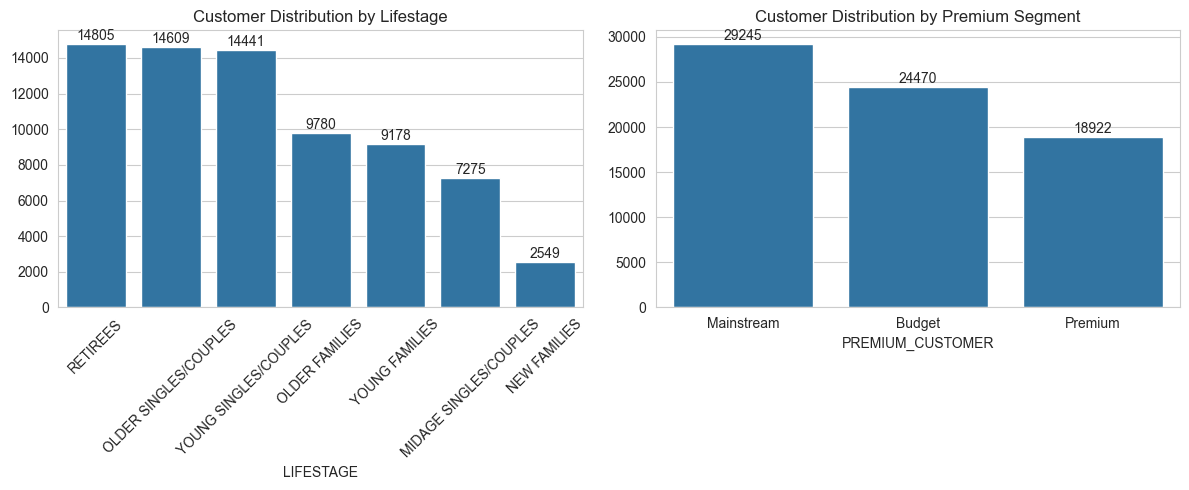

In [52]:
# Count customers per lifestage
lifestage_counts = purchase_behaviour["LIFESTAGE"].value_counts()

# Count customers per premium segment
premium_counts = purchase_behaviour["PREMIUM_CUSTOMER"].value_counts()

# Plot distributions with labels
plt.figure(figsize=(12, 5))

# --- Lifestage ---
plt.subplot(1, 2, 1)
sns.barplot(x=lifestage_counts.index, y=lifestage_counts.values)
plt.xticks(rotation=45)
plt.title("Customer Distribution by Lifestage")

# Add counts on bars
for i, val in enumerate(lifestage_counts.values):
    plt.text(i, val + 50, str(val), ha='center', va='bottom')

# --- Premium Segment ---
plt.subplot(1, 2, 2)
sns.barplot(x=premium_counts.index, y=premium_counts.values)
plt.title("Customer Distribution by Premium Segment")

# Add counts on bars
for i, val in enumerate(premium_counts.values):
    plt.text(i, val + 50, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 5. Merge Datasets

In [53]:
df = transaction_data.merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="inner")
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size (g),Brand,Spend_per_Transaction,Unit_Price,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co,6.0,3.00,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,6.3,2.10,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,2.9,1.45,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,15.0,3.00,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,13.8,4.60,MIDAGE SINGLES/COUPLES,Budget


In [54]:
df.shape

(249667, 14)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249667 entries, 0 to 249666
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DATE                   249667 non-null  datetime64[ns]
 1   STORE_NBR              249667 non-null  int64         
 2   LYLTY_CARD_NBR         249667 non-null  int64         
 3   TXN_ID                 249667 non-null  int64         
 4   PROD_NBR               249667 non-null  int64         
 5   PROD_NAME              249667 non-null  object        
 6   PROD_QTY               249667 non-null  int64         
 7   TOT_SALES              249667 non-null  float64       
 8   Pack_Size (g)          249667 non-null  object        
 9   Brand                  249667 non-null  object        
 10  Spend_per_Transaction  249667 non-null  float64       
 11  Unit_Price             249667 non-null  float64       
 12  LIFESTAGE              249667 non-null  obje

In [56]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Spend_per_Transaction,Unit_Price
count,249667,249667.000000,2.496670e+05,2.496670e+05,249667.000000,249667.000000,249667.000000,249667.000000,249667.000000
mean,2018-12-30 02:26:13.683346176,135.043662,1.355197e+05,1.351228e+05,56.294753,1.906175,7.288822,7.377441,3.818550
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,1.700000,1.320000
25%,2018-09-30 00:00:00,70.000000,7.001600e+04,6.757350e+04,27.000000,2.000000,5.700000,5.800000,3.000000
50%,2018-12-30 00:00:00,130.000000,1.303600e+05,1.351470e+05,53.000000,2.000000,7.400000,7.400000,3.800000
75%,2019-03-31 00:00:00,203.000000,2.030790e+05,2.026325e+05,86.000000,2.000000,8.800000,8.800000,4.600000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,33.000000,6.500000
std,NaN,76.773600,8.065751e+04,7.813158e+04,33.528625,0.342744,2.475283,2.619908,1.079015


In [57]:
df.duplicated().sum()   

np.int64(0)

In [58]:
# save dataframe
df.to_csv("QVI_Combined_Data.csv", index=False)

# 6. Exploratory Data Analysis (EDA)


In [59]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Load the combined dataset
df = pd.read_csv("QVI_Combined_Data.csv")
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size (g),Brand,Spend_per_Transaction,Unit_Price,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co,6.0,3.00,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,6.3,2.10,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,2.9,1.45,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,15.0,3.00,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,13.8,4.60,MIDAGE SINGLES/COUPLES,Budget


In [60]:
# -----------------------------
# 1. Basic Data Overview
# -----------------------------
display("Data Shape:", df.shape)
display("\nData Types:\n", df.dtypes)
display("\nMissing Values:\n", df.isnull().sum())
display("\nUnique Values per Column:\n", df.nunique())
display("\nStatistical Summary:\n", df.describe(include='all'))


'Data Shape:'

(249667, 14)

'\nData Types:\n'

DATE                      object
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
Pack_Size (g)              int64
Brand                     object
Spend_per_Transaction    float64
Unit_Price               float64
LIFESTAGE                 object
PREMIUM_CUSTOMER          object
dtype: object

'\nMissing Values:\n'

DATE                     0
STORE_NBR                0
LYLTY_CARD_NBR           0
TXN_ID                   0
PROD_NBR                 0
PROD_NAME                0
PROD_QTY                 0
TOT_SALES                0
Pack_Size (g)            0
Brand                    0
Spend_per_Transaction    0
Unit_Price               0
LIFESTAGE                0
PREMIUM_CUSTOMER         0
dtype: int64

'\nUnique Values per Column:\n'

DATE                        364
STORE_NBR                   271
LYLTY_CARD_NBR            71517
TXN_ID                   248156
PROD_NBR                    107
PROD_NAME                   107
PROD_QTY                      5
TOT_SALES                   104
Pack_Size (g)                20
Brand                        20
Spend_per_Transaction       183
Unit_Price                   40
LIFESTAGE                     7
PREMIUM_CUSTOMER              3
dtype: int64

'\nStatistical Summary:\n'

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size (g),Brand,Spend_per_Transaction,Unit_Price,LIFESTAGE,PREMIUM_CUSTOMER
count,249667,249667.000000,2.496670e+05,2.496670e+05,249667.000000,249667,249667.000000,249667.000000,249667.000000,249667,249667.000000,249667.000000,249667,249667
unique,364,NaN,NaN,NaN,NaN,107,NaN,NaN,NaN,20,NaN,NaN,7,3
top,2018-12-24,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,NaN,Kettle,NaN,NaN,OLDER SINGLES/COUPLES,Mainstream
freq,880,NaN,NaN,NaN,NaN,3304,NaN,NaN,NaN,41288,NaN,NaN,51362,96122
mean,NaN,135.043662,1.355197e+05,1.351228e+05,56.294753,NaN,1.906175,7.288822,175.283490,NaN,7.377441,3.818550,NaN,NaN
std,NaN,76.773600,8.065751e+04,7.813158e+04,33.528625,NaN,0.342744,2.475283,59.146873,NaN,2.619908,1.079015,NaN,NaN
min,NaN,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.700000,70.000000,NaN,1.700000,1.320000,NaN,NaN
25%,NaN,70.000000,7.001600e+04,6.757350e+04,27.000000,NaN,2.000000,5.700000,150.000000,NaN,5.800000,3.000000,NaN,NaN
50%,NaN,130.000000,1.303600e+05,1.351470e+05,53.000000,NaN,2.000000,7.400000,170.000000,NaN,7.400000,3.800000,NaN,NaN
75%,NaN,203.000000,2.030790e+05,2.026325e+05,86.000000,NaN,2.000000,8.800000,175.000000,NaN,8.800000,4.600000,NaN,NaN


<h1 style="text-align: center; font-weight: bold;">Customers</h1>


## Customer LIFESTAGE

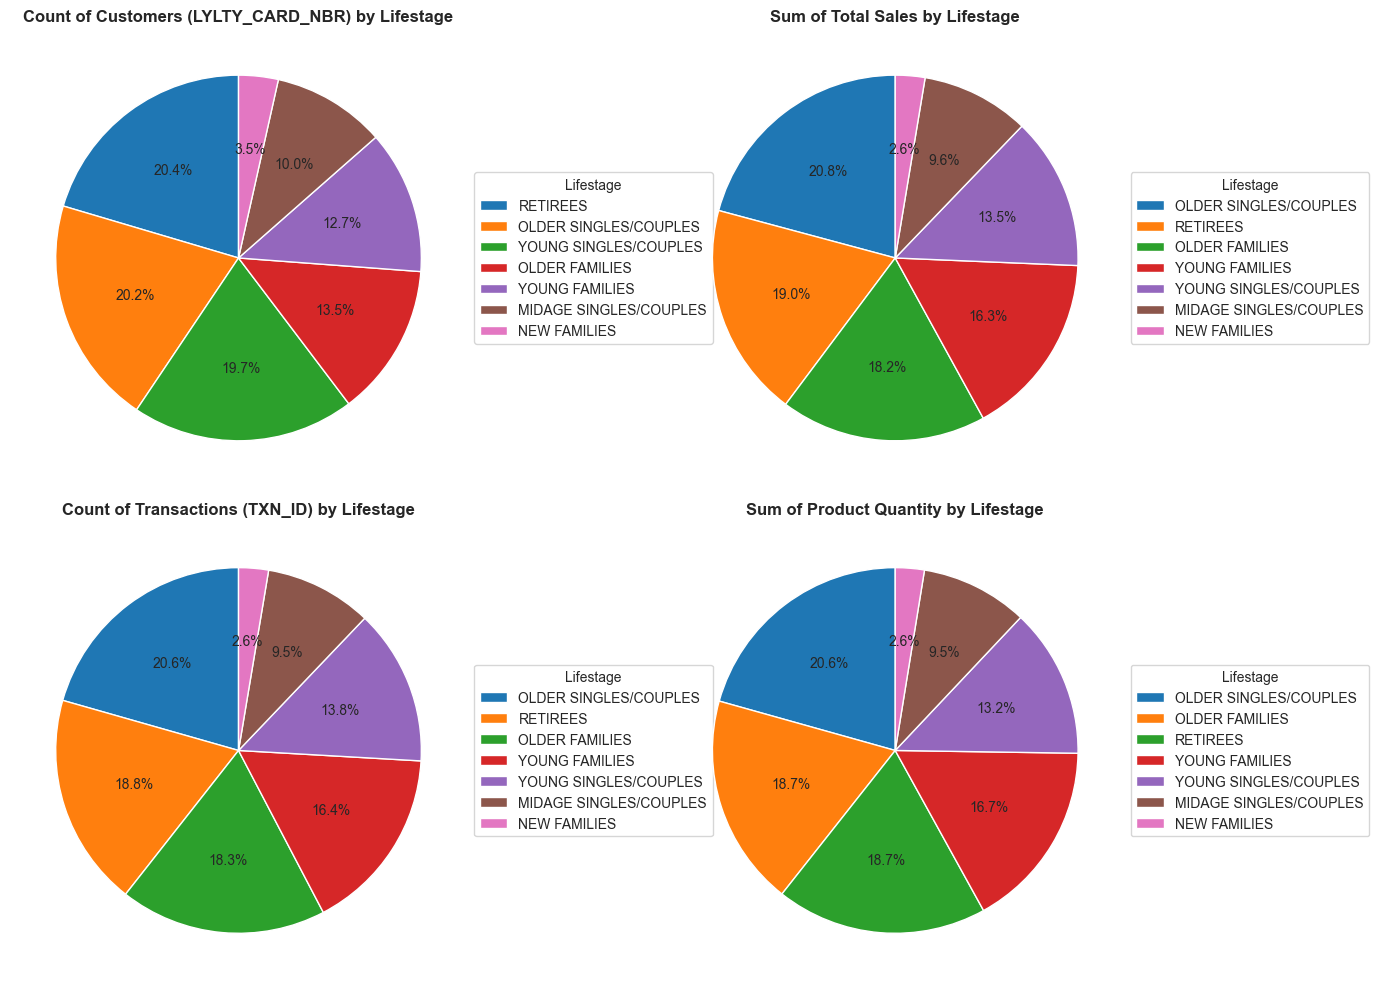

In [61]:
import matplotlib.pyplot as plt

# --- Aggregations ---
cust_count = df.groupby("LIFESTAGE")["LYLTY_CARD_NBR"].nunique()   # Count of unique customers
sales_sum = df.groupby("LIFESTAGE")["TOT_SALES"].sum()             # Total sales
txn_count = df.groupby("LIFESTAGE")["TXN_ID"].nunique()            # Count of unique transactions
qty_sum = df.groupby("LIFESTAGE")["PROD_QTY"].sum()                # Total quantity sold

# Dictionary of data
charts = {
    "Count of Customers (LYLTY_CARD_NBR) by Lifestage": cust_count,
    "Sum of Total Sales by Lifestage": sales_sum,
    "Count of Transactions (TXN_ID) by Lifestage": txn_count,
    "Sum of Product Quantity by Lifestage": qty_sum
}

# --- Plot ---
fig, axes = plt.subplots(2, 2, figsize=(14,10))

for ax, (title, data) in zip(axes.flatten(), charts.items()):
    # Sort descending
    data = data.sort_values(ascending=False)
    
    wedges, texts, autotexts = ax.pie(
        data, 
        autopct=lambda p: f"{p:.1f}%", 
        startangle=90
    )
    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.legend(
        wedges, data.index, 
        title="Lifestage", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)   # move legend to right center
    )

plt.tight_layout()
plt.show()


## Customer PREMIUM

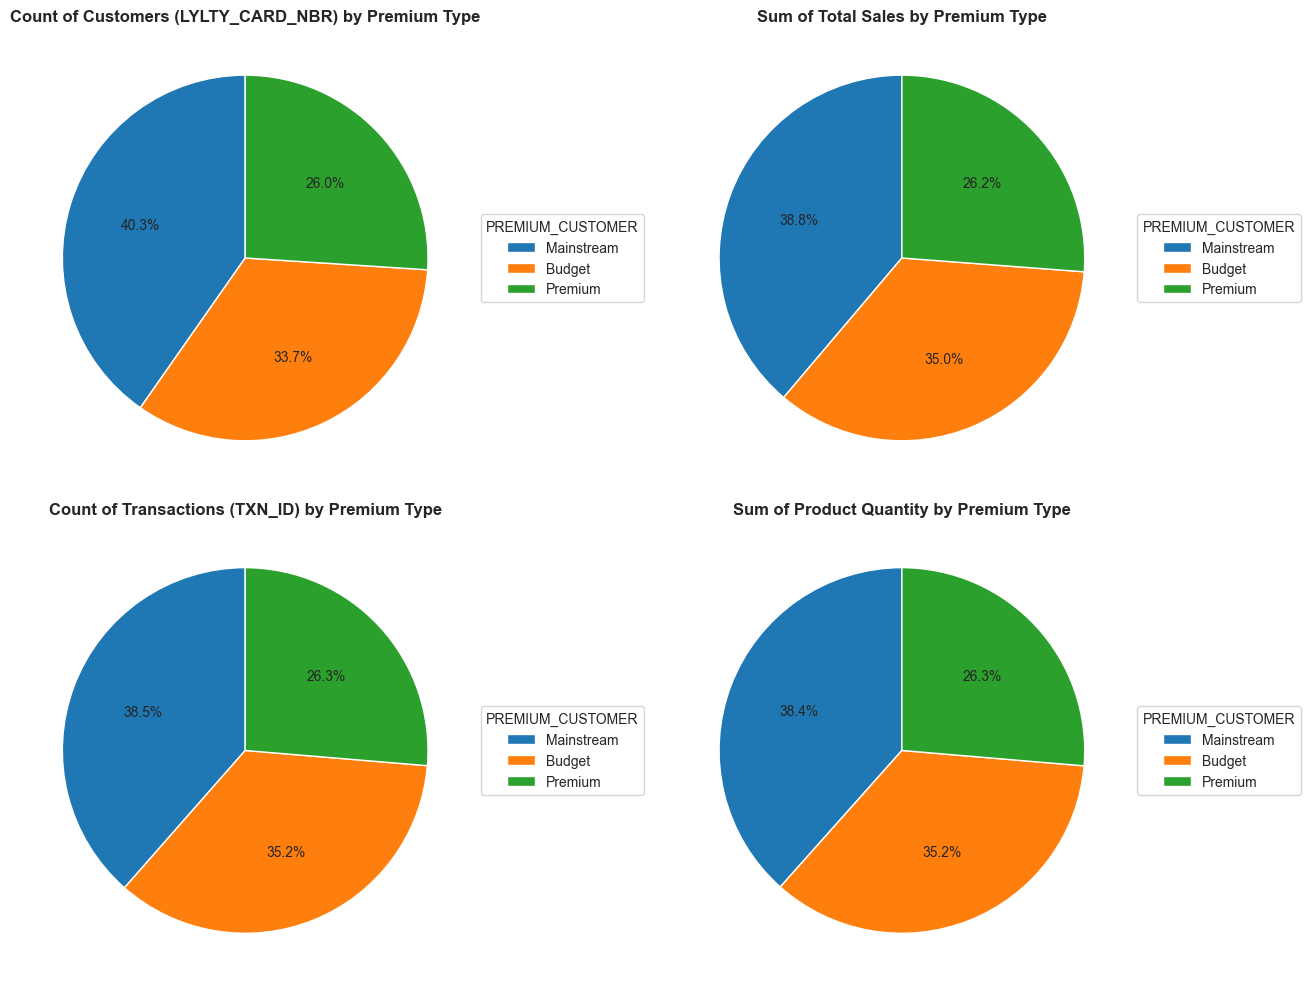

In [62]:
import matplotlib.pyplot as plt

# --- Aggregations by PREMIUM_CUSTOMER ---
cust_count_prem = df.groupby("PREMIUM_CUSTOMER")["LYLTY_CARD_NBR"].nunique()
sales_sum_prem = df.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].sum()
txn_count_prem = df.groupby("PREMIUM_CUSTOMER")["TXN_ID"].nunique()
qty_sum_prem = df.groupby("PREMIUM_CUSTOMER")["PROD_QTY"].sum()

# Dictionary of data
charts_prem = {
    "Count of Customers (LYLTY_CARD_NBR) by Premium Type": cust_count_prem,
    "Sum of Total Sales by Premium Type": sales_sum_prem,
    "Count of Transactions (TXN_ID) by Premium Type": txn_count_prem,
    "Sum of Product Quantity by Premium Type": qty_sum_prem
}

# --- Plot ---
fig, axes = plt.subplots(2, 2, figsize=(14,10))

for ax, (title, data) in zip(axes.flatten(), charts_prem.items()):
    # Sort descending for consistent layout
    data = data.sort_values(ascending=False)
    
    wedges, texts, autotexts = ax.pie(
        data, 
        autopct=lambda p: f"{p:.1f}%", 
        startangle=90
    )
    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.legend(
        wedges, data.index, 
        title="PREMIUM_CUSTOMER", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)   # legend at right
    )

plt.tight_layout()
plt.show()


## PREMIUM WITH LIFESTAGE

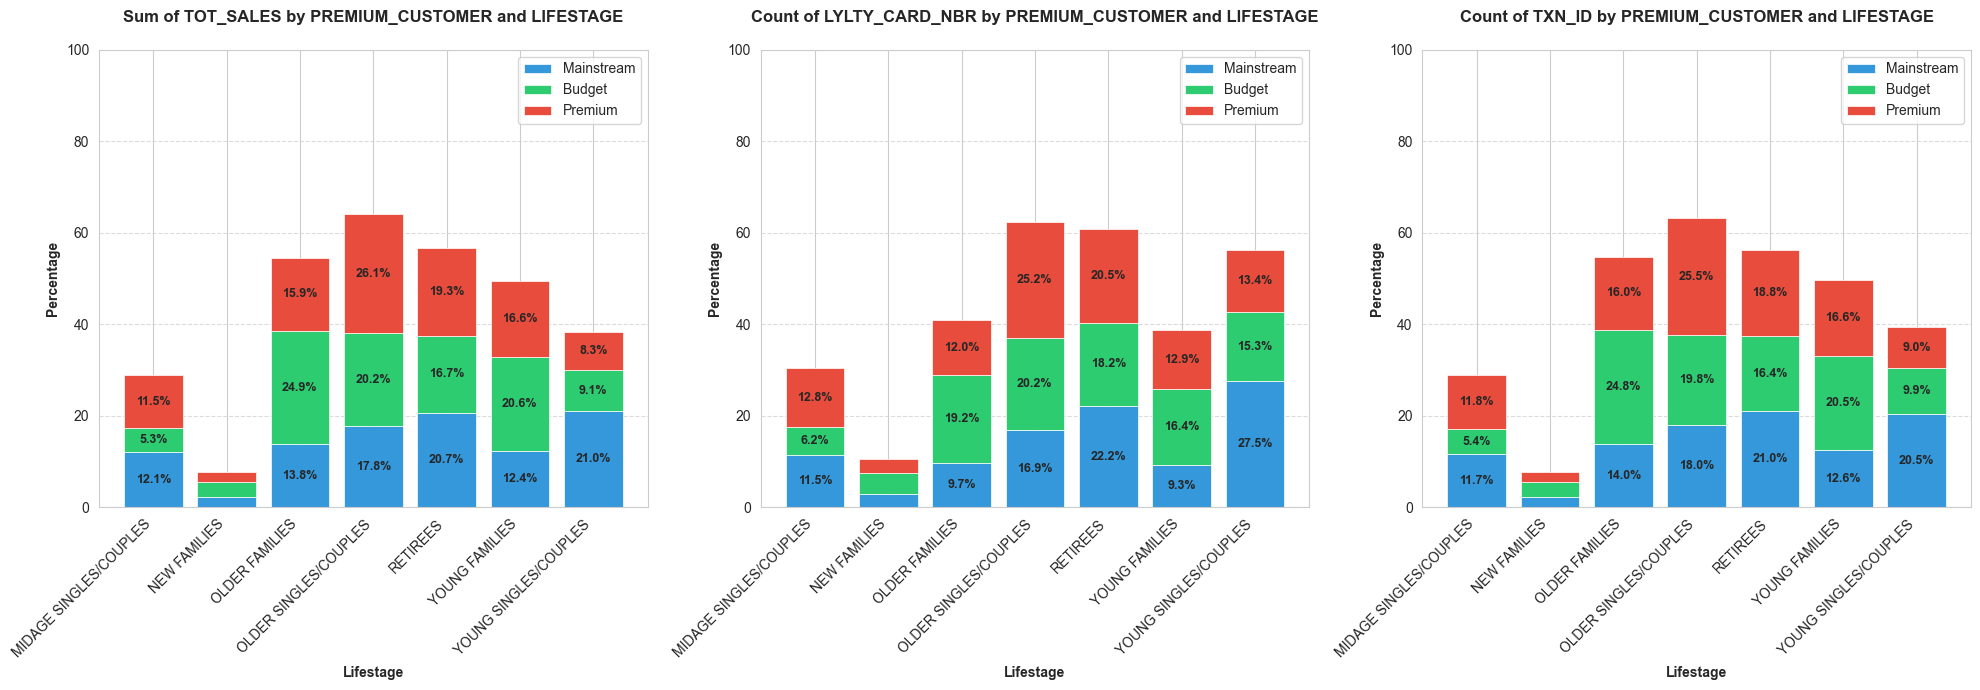

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Aggregations by PREMIUM_CUSTOMER and LIFESTAGE ---
# 1. Sum of TOT_SALES by PREMIUM_CUSTOMER and LIFESTAGE
sales_pivot = df.pivot_table(
    values='TOT_SALES', 
    index='PREMIUM_CUSTOMER', 
    columns='LIFESTAGE', 
    aggfunc='sum'
)

# Calculate percentages
sales_percentages = sales_pivot.div(sales_pivot.sum(axis=1), axis=0) * 100

# 2. Count of LYLTY_CARD_NBR by PREMIUM_CUSTOMER and LIFESTAGE
unique_customers = df.drop_duplicates('LYLTY_CARD_NBR')[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']]
customer_pivot = pd.crosstab(
    index=unique_customers['PREMIUM_CUSTOMER'],
    columns=unique_customers['LIFESTAGE']
)
customer_percentages = customer_pivot.div(customer_pivot.sum(axis=1), axis=0) * 100

# 3. Count of TXN_ID by PREMIUM_CUSTOMER and LIFESTAGE
txn_pivot = pd.crosstab(
    index=df['PREMIUM_CUSTOMER'],
    columns=df['LIFESTAGE']
)
txn_percentages = txn_pivot.div(txn_pivot.sum(axis=1), axis=0) * 100

# Dictionary of data
charts_data = {
    "Sum of TOT_SALES by PREMIUM_CUSTOMER and LIFESTAGE": sales_percentages,
    "Count of LYLTY_CARD_NBR by PREMIUM_CUSTOMER and LIFESTAGE": customer_percentages,
    "Count of TXN_ID by PREMIUM_CUSTOMER and LIFESTAGE": txn_percentages
}

# --- Plot ---
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Define colors for each customer segment
colors = ['#3498db', '#2ecc71', '#e74c3c']  # Blue, Green, Red

for ax, (title, data) in zip(axes.flatten(), charts_data.items()):
    # Prepare data for plotting
    mainstream = data.loc['Mainstream'].fillna(0)
    budget = data.loc['Budget'].fillna(0)
    premium = data.loc['Premium'].fillna(0)
    
    # Create the stacked bars
    x_pos = np.arange(len(data.columns))
    bar_width = 0.8
    
    bars_main = ax.bar(x_pos, mainstream, bar_width, label='Mainstream', color=colors[0], 
                       edgecolor='white', linewidth=0.5)
    bars_budg = ax.bar(x_pos, budget, bar_width, bottom=mainstream, label='Budget', color=colors[1], 
                       edgecolor='white', linewidth=0.5)
    bars_prem = ax.bar(x_pos, premium, bar_width, bottom=mainstream+budget, label='Premium', color=colors[2], 
                       edgecolor='white', linewidth=0.5)
    
    # Customize the chart
    ax.set_title(title, fontsize=12, fontweight="bold", pad=20)
    ax.set_xlabel('Lifestage', fontweight='bold')
    ax.set_ylabel('Percentage', fontweight='bold')
    
    # Set x-axis labels
    ax.set_xticks(x_pos)
    ax.set_xticklabels(data.columns, rotation=45, ha='right')
    
    # Set y-axis limit and grid
    ax.set_ylim(0, 100)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    # Add legend
    ax.legend(loc='upper right')
    
    # Add percentage labels to the bars
    for i, (m, b, p) in enumerate(zip(mainstream, budget, premium)):
        total = m + b + p
        if m > 5:
            ax.text(i, m/2, f'{m:.1f}%', ha='center', va='center', fontweight='bold', fontsize=9)
        if b > 5:
            ax.text(i, m + b/2, f'{b:.1f}%', ha='center', va='center', fontweight='bold', fontsize=9)
        if p > 5:
            ax.text(i, m + b + p/2, f'{p:.1f}%', ha='center', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


## LIFESTAGE WITH PREMIUM

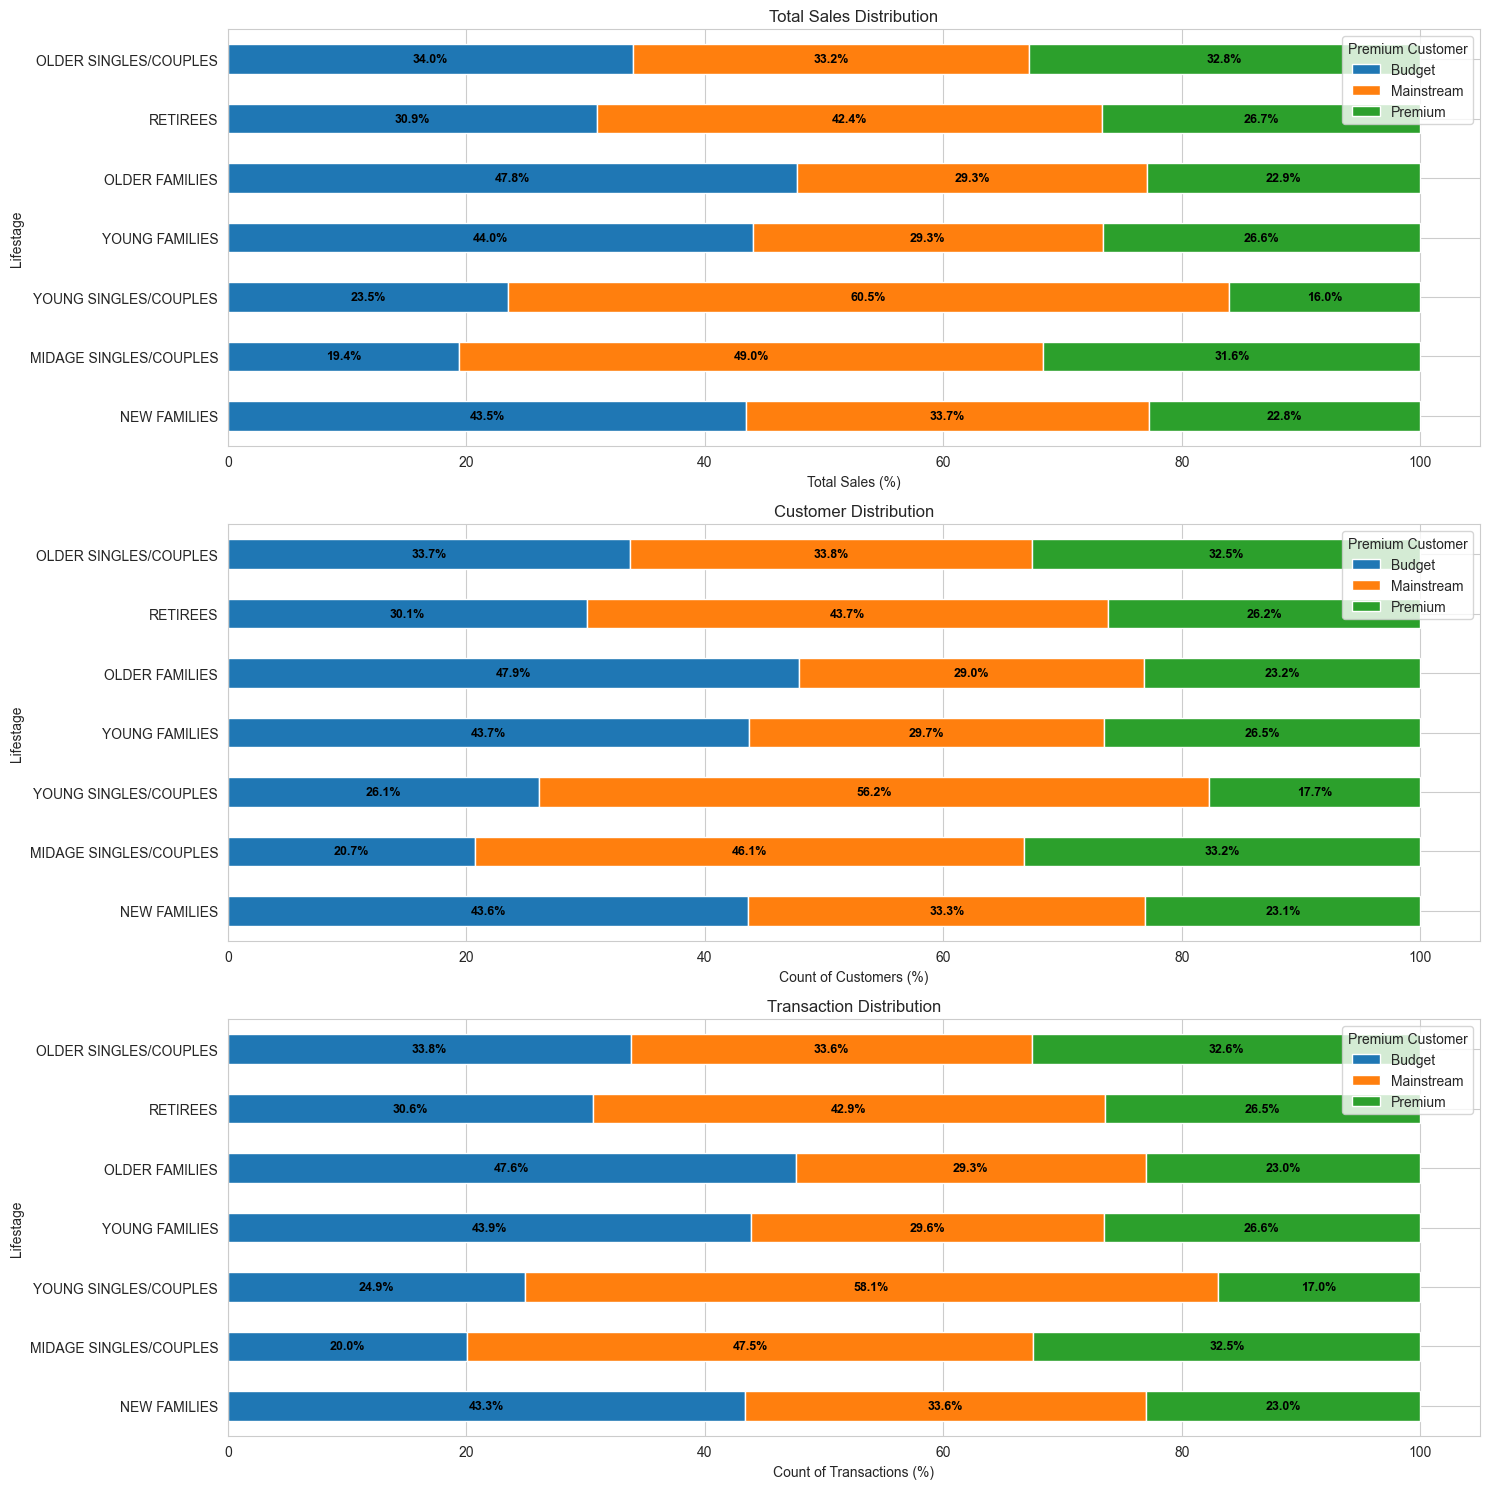

In [64]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the total sales, customer count, and product quantity for each segment
total_sales = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()
customer_count = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().unstack()
total_quantity = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().unstack()

# Sort the lifestages based on total sales in descending order
sorted_lifestage = total_sales.sum(axis=1).sort_values(ascending=True).index
total_sales = total_sales.loc[sorted_lifestage]
customer_count = customer_count.loc[sorted_lifestage]
total_quantity = total_quantity.loc[sorted_lifestage]

# Convert the data to 100% stacked percentages
sales_percent = total_sales.div(total_sales.sum(axis=1), axis=0) * 100
customers_percent = customer_count.div(customer_count.sum(axis=1), axis=0) * 100
quantity_percent = total_quantity.div(total_quantity.sum(axis=1), axis=0) * 100

# Create a figure with three subplots, arranged in 3 rows and 1 column
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# Plot the 100% stacked bar charts
sales_percent.plot(kind='barh', stacked=True, ax=axes[0])
customers_percent.plot(kind='barh', stacked=True, ax=axes[1])
quantity_percent.plot(kind='barh', stacked=True, ax=axes[2])

# Function to add percentage labels to the bars
def add_labels(ax):
    for container in ax.containers:
        for i, bar in enumerate(container):
            width = bar.get_width()
            if width > 0:
                ax.annotate(f'{width:.1f}%',
                            xy=(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2),
                            ha='center', va='center', color='black',
                            fontsize=9, fontweight='bold')

# Add labels and titles to the charts
axes[0].set_title('Total Sales Distribution')
axes[0].set_xlabel('Total Sales (%)')
axes[0].set_ylabel('Lifestage')
axes[0].legend(title='Premium Customer', loc='upper right')
add_labels(axes[0])

axes[1].set_title('Customer Distribution')
axes[1].set_xlabel('Count of Customers (%)')
axes[1].set_ylabel('Lifestage')
axes[1].legend(title='Premium Customer', loc='upper right')
add_labels(axes[1])

axes[2].set_title('Transaction Distribution')
axes[2].set_xlabel('Count of Transactions (%)')
axes[2].set_ylabel('Lifestage')
axes[2].legend(title='Premium Customer', loc='upper right')
add_labels(axes[2])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## PREMIUM WIth Brand

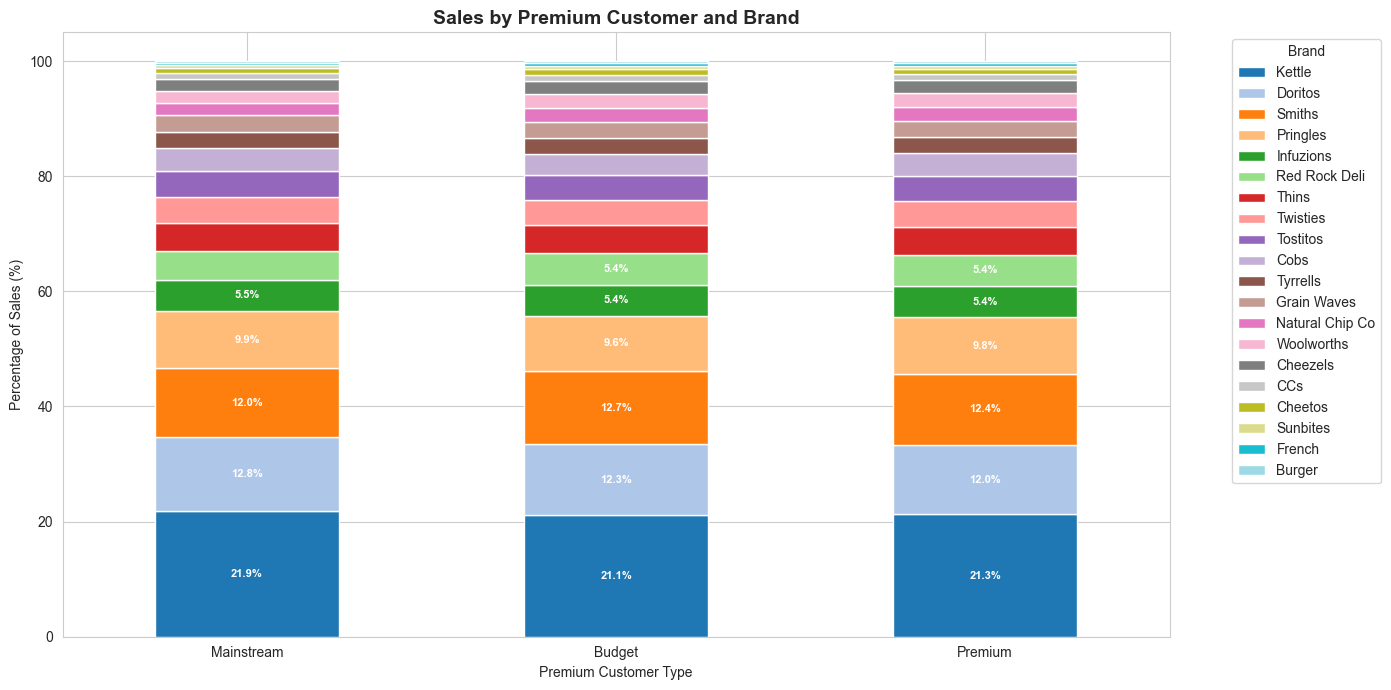

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Prepare data ---
brand_sales = df.groupby(["PREMIUM_CUSTOMER", "Brand"])["TOT_SALES"].sum().reset_index()

# Pivot for stacked bar
brand_sales_pivot = brand_sales.pivot(
    index="PREMIUM_CUSTOMER", 
    columns="Brand", 
    values="TOT_SALES"
).fillna(0)

# --- Sort PREMIUM_CUSTOMER by total sales ---
brand_sales_pivot = brand_sales_pivot.loc[
    brand_sales_pivot.sum(axis=1).sort_values(ascending=False).index
]

# --- Sort brands (columns) by overall total sales ---
brand_order = brand_sales_pivot.sum(axis=0).sort_values(ascending=False).index
brand_sales_pivot = brand_sales_pivot[brand_order]

# Convert to percentages (100% stacked)
brand_sales_percent = brand_sales_pivot.div(brand_sales_pivot.sum(axis=1), axis=0) * 100

# --- Plot ---
ax = brand_sales_percent.plot(
    kind="bar", 
    stacked=True, 
    rot=0,
    figsize=(14, 7),
    colormap="tab20"   # large color palette for brands
)

plt.title("Sales by Premium Customer and Brand", fontsize=14, fontweight="bold")
plt.xlabel("Premium Customer Type")
plt.ylabel("Percentage of Sales (%)")

# Add percentage labels (only if big enough, e.g. >5%)
for i, row in enumerate(brand_sales_percent.values):
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 5:
            ax.text(i, cum_sum + val/2, f"{val:.1f}%", 
                    ha="center", va="center", fontsize=8, fontweight="bold", color="white")
        cum_sum += val

# Custom sorted legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, brand_order, title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


## LIFESTAGE WIth Brand

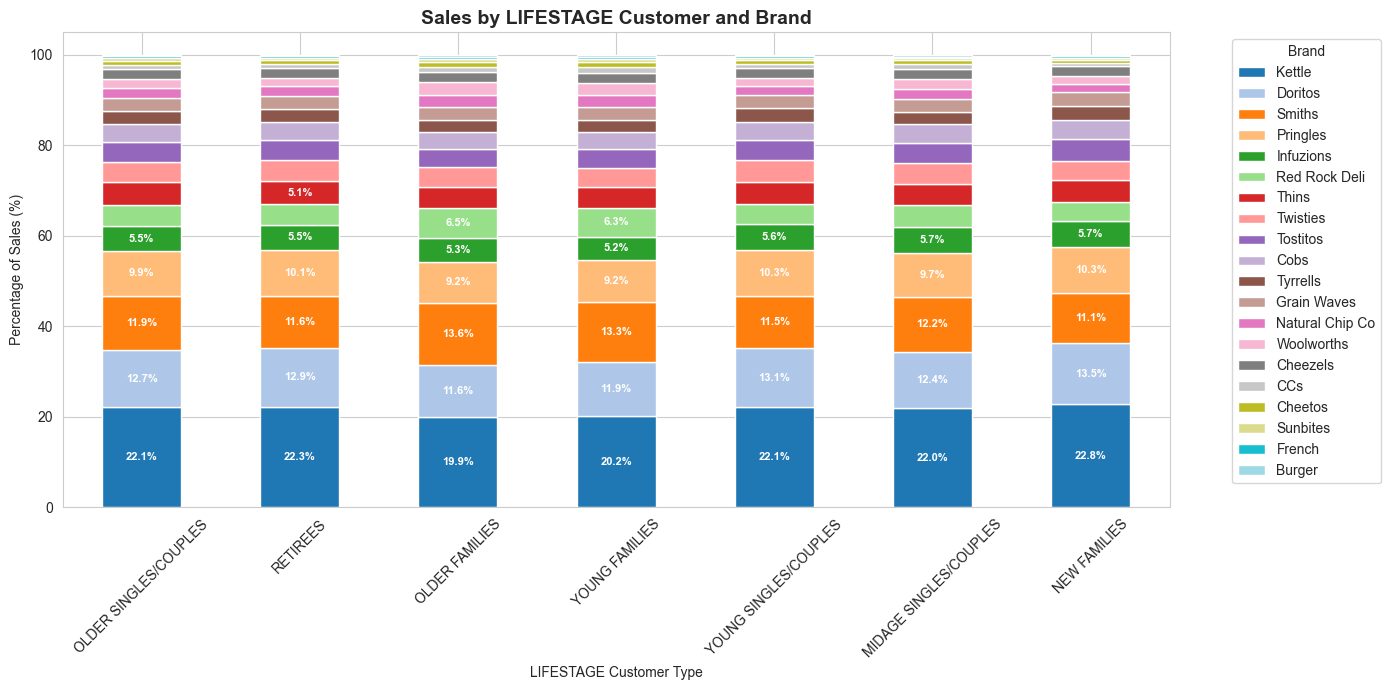

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Prepare data ---
brand_sales = df.groupby(["LIFESTAGE", "Brand"])["TOT_SALES"].sum().reset_index()

# Pivot for stacked bar
brand_sales_pivot = brand_sales.pivot(
    index="LIFESTAGE", 
    columns="Brand", 
    values="TOT_SALES"
).fillna(0)

# --- Sort LIFESTAGE by total sales ---
brand_sales_pivot = brand_sales_pivot.loc[
    brand_sales_pivot.sum(axis=1).sort_values(ascending=False).index
]

# --- Sort Brands by overall sales ---
brand_order = brand_sales_pivot.sum(axis=0).sort_values(ascending=False).index
brand_sales_pivot = brand_sales_pivot[brand_order]

# Convert to percentages (100% stacked)
brand_sales_percent = brand_sales_pivot.div(brand_sales_pivot.sum(axis=1), axis=0) * 100

# --- Plot ---
ax = brand_sales_percent.plot(
    kind="bar", 
    stacked=True, 
    rot=45,   # rotate labels for readability
    figsize=(14, 7),
    colormap="tab20"
)

plt.title("Sales by LIFESTAGE Customer and Brand", fontsize=14, fontweight="bold")
plt.xlabel("LIFESTAGE Customer Type")
plt.ylabel("Percentage of Sales (%)")

# Add percentage labels (only if >5%)
for i, row in enumerate(brand_sales_percent.values):
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 5:
            ax.text(i, cum_sum + val/2, f"{val:.1f}%", 
                    ha="center", va="center", fontsize=8, fontweight="bold", color="white")
        cum_sum += val

# Custom legend sorted by sales
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, brand_order, title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


## PREIMIUM With Store

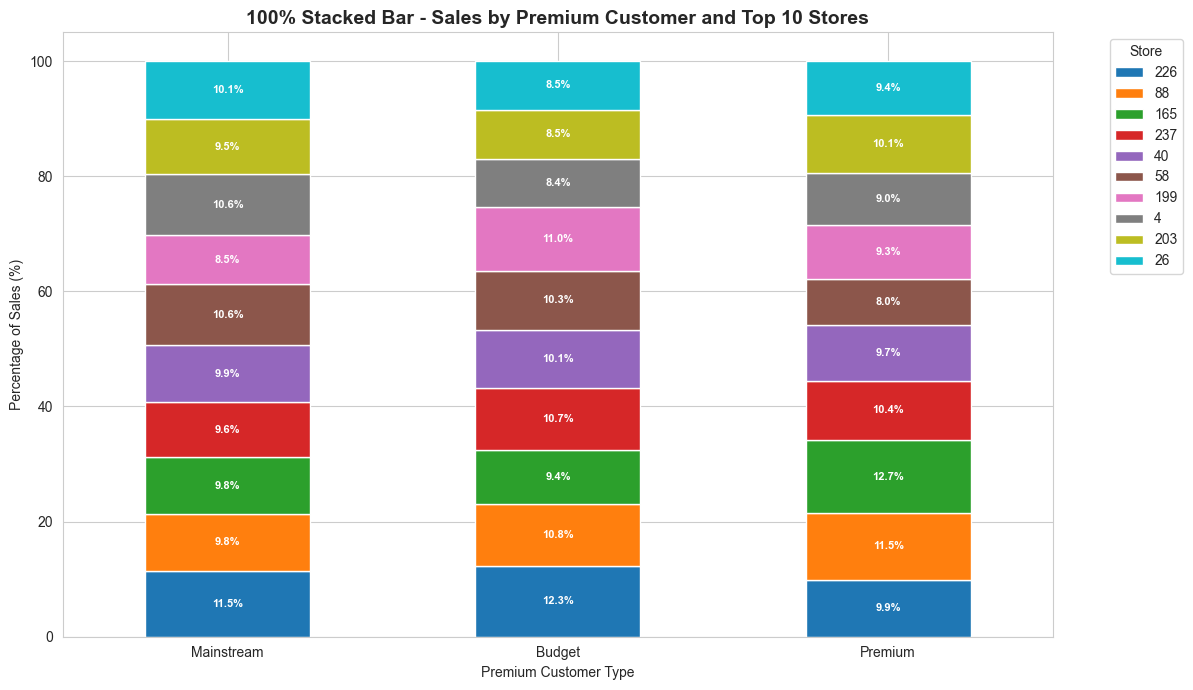

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Aggregate total sales by store and premium ---
store_premium_sales = (
    df.groupby(["PREMIUM_CUSTOMER", "STORE_NBR"])["TOT_SALES"]
    .sum()
    .reset_index()
)

# --- Get top 10 stores by total sales ---
top_stores = (
    store_premium_sales.groupby("STORE_NBR")["TOT_SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# --- Filter for top 10 stores ---
store_premium_sales = store_premium_sales[
    store_premium_sales["STORE_NBR"].isin(top_stores)
]

# Pivot for stacked bar
pivot_data = store_premium_sales.pivot(
    index="PREMIUM_CUSTOMER",
    columns="STORE_NBR",
    values="TOT_SALES"
).fillna(0)

# --- Sort PREMIUM_CUSTOMER (x-axis) by total sales ---
pivot_data = pivot_data.loc[
    pivot_data.sum(axis=1).sort_values(ascending=False).index
]

# --- Sort stores (legend) by total sales contribution ---
store_order = pivot_data.sum(axis=0).sort_values(ascending=False).index
pivot_data = pivot_data[store_order]

# Convert to percentages (100% stacked)
pivot_percent = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# --- Plot ---
ax = pivot_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 7),
    colormap="tab10"
)

plt.title("100% Stacked Bar - Sales by Premium Customer and Top 10 Stores", fontsize=14, fontweight="bold")
plt.xlabel("Premium Customer Type")
plt.ylabel("Percentage of Sales (%)")
plt.xticks(rotation=0)

# --- Add percentage labels inside bars ---
for i, row in enumerate(pivot_percent.values):
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 5:  # Show only if >5%
            ax.text(
                i,
                cum_sum + val / 2,
                f"{val:.1f}%",
                ha="center",
                va="center",
                fontsize=8,
                fontweight="bold",
                color="white"
            )
        cum_sum += val

# --- Custom sorted legend ---
handles, labels = ax.get_legend_handles_labels()
# Reorder legend by store_order
sorted_handles = [handles[labels.index(str(s))] for s in store_order]
ax.legend(sorted_handles, store_order, title="Store", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


## LIFESTAGE with Store

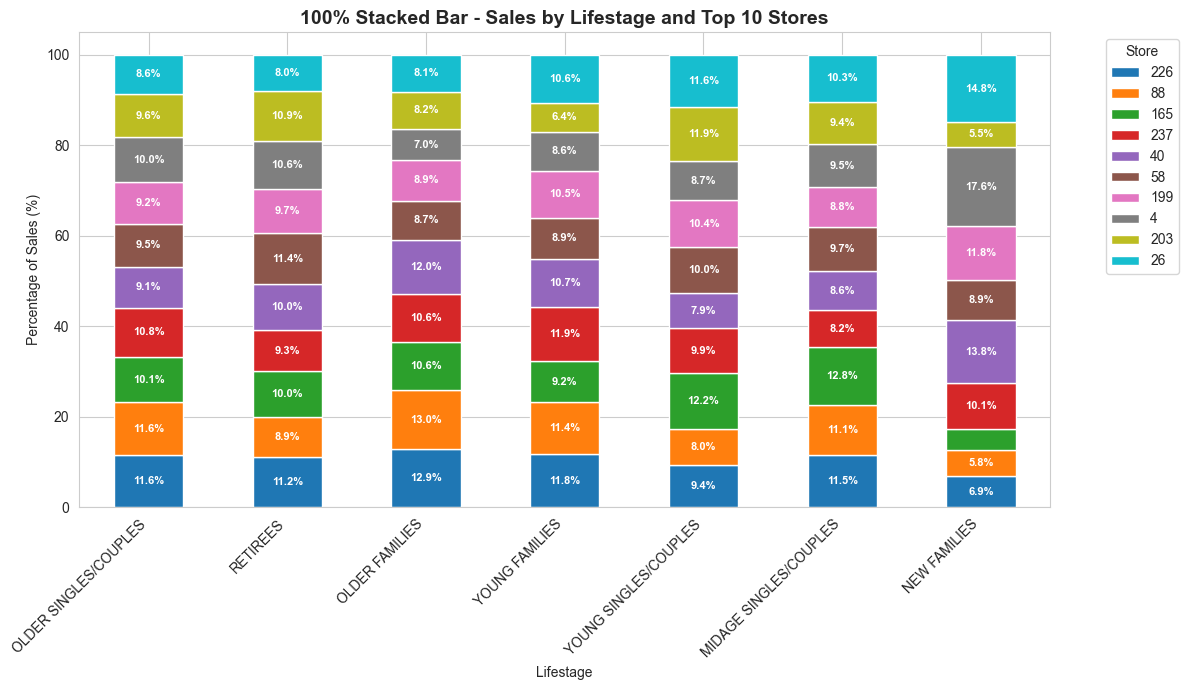

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Aggregate total sales by store and lifestage ---
store_lifestage_sales = (
    df.groupby(["LIFESTAGE", "STORE_NBR"])["TOT_SALES"]
    .sum()
    .reset_index()
)

# --- Get top 10 stores by total sales ---
top_stores = (
    store_lifestage_sales.groupby("STORE_NBR")["TOT_SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# --- Filter for top 10 stores ---
store_lifestage_sales = store_lifestage_sales[
    store_lifestage_sales["STORE_NBR"].isin(top_stores)
]

# Pivot for stacked bar
pivot_data = store_lifestage_sales.pivot(
    index="LIFESTAGE",
    columns="STORE_NBR",
    values="TOT_SALES"
).fillna(0)

# --- Sort LIFESTAGE (x-axis) by total sales ---
pivot_data = pivot_data.loc[
    pivot_data.sum(axis=1).sort_values(ascending=False).index
]

# --- Sort stores (legend) by total sales contribution ---
store_order = pivot_data.sum(axis=0).sort_values(ascending=False).index
pivot_data = pivot_data[store_order]

# Convert to percentages (100% stacked)
pivot_percent = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# --- Plot ---
ax = pivot_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 7),
    colormap="tab10"
)

plt.title("100% Stacked Bar - Sales by Lifestage and Top 10 Stores", fontsize=14, fontweight="bold")
plt.xlabel("Lifestage")
plt.ylabel("Percentage of Sales (%)")
plt.xticks(rotation=45, ha="right")

# --- Add percentage labels inside bars ---
for i, row in enumerate(pivot_percent.values):
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 5:  # Show only if >5%
            ax.text(
                i,
                cum_sum + val / 2,
                f"{val:.1f}%",
                ha="center",
                va="center",
                fontsize=8,
                fontweight="bold",
                color="white"
            )
        cum_sum += val

# --- Custom sorted legend ---
handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(str(s))] for s in store_order]
ax.legend(sorted_handles, store_order, title="Store", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


<h1 style="text-align: center; font-weight: bold;">Brand</h1>


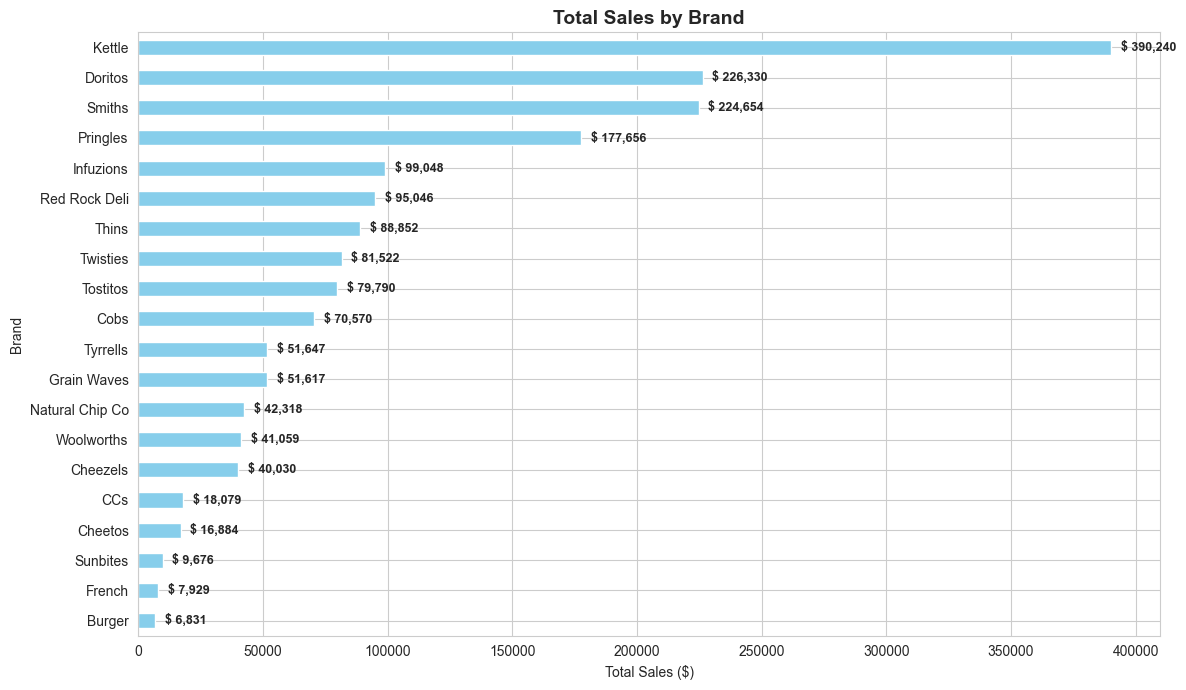

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Prepare data ---
brand_sales = df.groupby("Brand")["TOT_SALES"].sum().sort_values(ascending=True)  # ascending for nice horizontal bars

# --- Plot ---
plt.figure(figsize=(12, 7))
ax = brand_sales.plot(kind="barh", color="skyblue")

plt.title("Total Sales by Brand", fontsize=14, fontweight="bold")
plt.xlabel("Total Sales ($)")
plt.ylabel("Brand")

# Add labels on bars
for i, v in enumerate(brand_sales):
    ax.text(v + (0.01 * brand_sales.max()), i, f"$ {v:,.0f}", 
            va="center", fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()


## Brand with PREIMIUM

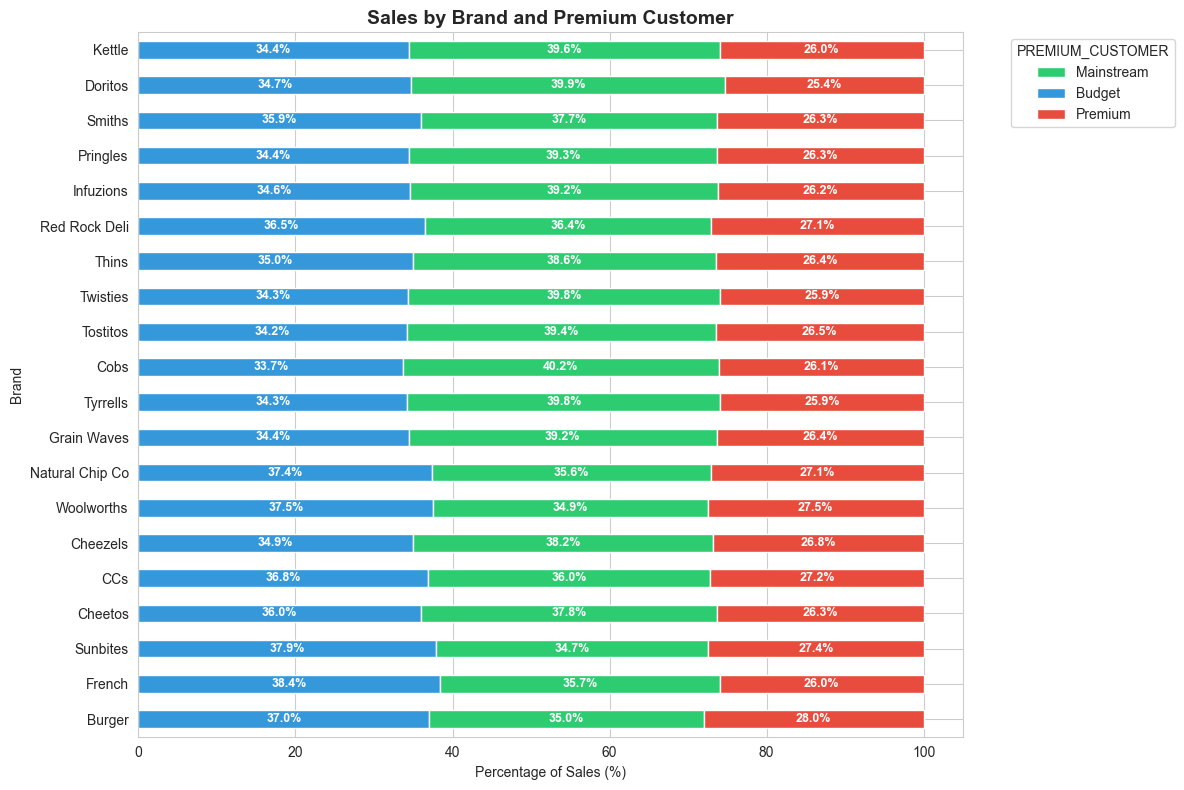

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Prepare data ---
brand_sales = df.groupby(["PREMIUM_CUSTOMER", "Brand"])["TOT_SALES"].sum().reset_index()

# Pivot for stacked bar
brand_sales_pivot = brand_sales.pivot(
    index="Brand", 
    columns="PREMIUM_CUSTOMER", 
    values="TOT_SALES"
).fillna(0)

# Convert to percentages for 100% stacked bar
brand_sales_percent = brand_sales_pivot.div(brand_sales_pivot.sum(axis=1), axis=0) * 100

# Sort brands by total sales (ascending for readability)
brand_sales_percent = brand_sales_percent.loc[
    brand_sales_pivot.sum(axis=1).sort_values(ascending=True).index
]

# --- Plot ---
ax = brand_sales_percent.plot(
    kind="barh", 
    stacked=True, 
    figsize=(12, 8),
    color=["#3498db", "#2ecc71", "#e74c3c"]  # Mainstream, Budget, Premium
)

plt.title("Sales by Brand and Premium Customer", fontsize=14, fontweight="bold")
plt.xlabel("Percentage of Sales (%)")
plt.ylabel("Brand")

# Add percentage labels inside bars
for i, row in enumerate(brand_sales_percent.values):
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 5:  # Show label only if >5%
            ax.text(cum_sum + val/2, i, f"{val:.1f}%", 
                    ha="center", va="center", fontsize=9, fontweight="bold", color="white")
        cum_sum += val

# --- Sort legend by total sales contribution ---
handles, labels = ax.get_legend_handles_labels()
premium_totals = brand_sales_pivot.sum(axis=0).sort_values(ascending=False)
sorted_labels = premium_totals.index.tolist()
sorted_handles = [handles[labels.index(l)] for l in sorted_labels]

ax.legend(
    sorted_handles, sorted_labels,
    title="PREMIUM_CUSTOMER",
    bbox_to_anchor=(1.05, 1), loc="upper left"
)

plt.tight_layout()
plt.show()


## Brand With LIFESTAGE

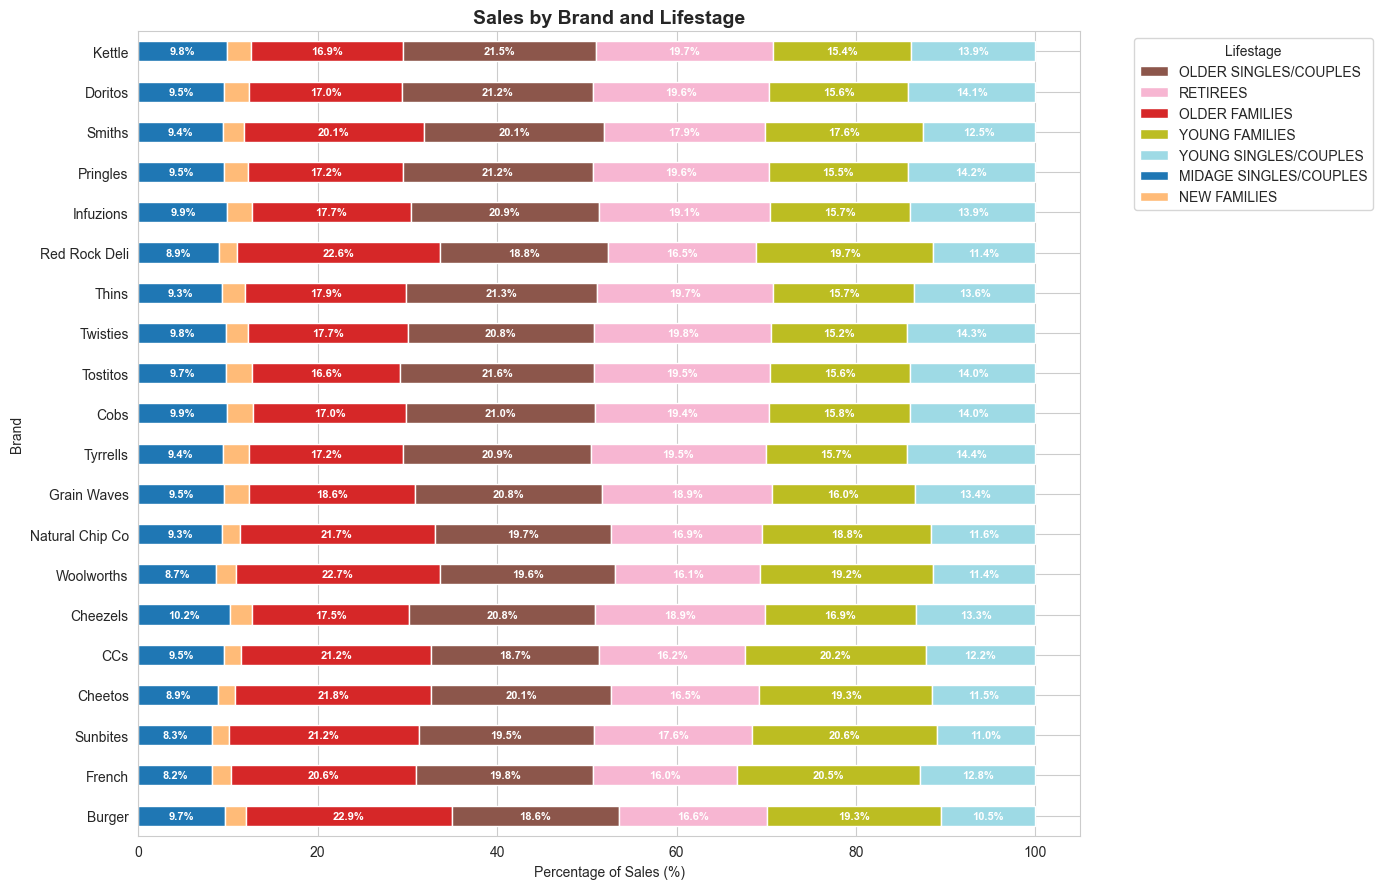

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Prepare data ---
brand_sales = df.groupby(["LIFESTAGE", "Brand"])["TOT_SALES"].sum().reset_index()

# Pivot for stacked bar
brand_sales_pivot = brand_sales.pivot(
    index="Brand", 
    columns="LIFESTAGE", 
    values="TOT_SALES"
).fillna(0)

# Convert to percentages for 100% stacked bar
brand_sales_percent = brand_sales_pivot.div(brand_sales_pivot.sum(axis=1), axis=0) * 100

# Sort brands by total sales (ascending for better layout)
brand_sales_percent = brand_sales_percent.loc[
    brand_sales_pivot.sum(axis=1).sort_values(ascending=True).index
]

# --- Plot ---
ax = brand_sales_percent.plot(
    kind="barh", 
    stacked=True, 
    figsize=(14, 9),
    colormap="tab20"  # large palette for many lifestages
)

plt.title("Sales by Brand and Lifestage", fontsize=14, fontweight="bold")
plt.xlabel("Percentage of Sales (%)")
plt.ylabel("Brand")

# Add percentage labels inside bars
for i, row in enumerate(brand_sales_percent.values):
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 5:  # Show label only if >5%
            ax.text(cum_sum + val/2, i, f"{val:.1f}%", 
                    ha="center", va="center", fontsize=8, fontweight="bold", color="white")
        cum_sum += val

# --- Sort legend by total sales contribution ---
handles, labels = ax.get_legend_handles_labels()
# Sum by lifestage across all brands
lifestage_totals = brand_sales_pivot.sum(axis=0).sort_values(ascending=False)
sorted_labels = lifestage_totals.index.tolist()
sorted_handles = [handles[labels.index(l)] for l in sorted_labels]

ax.legend(sorted_handles, sorted_labels, title="Lifestage", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


## Brand With Store

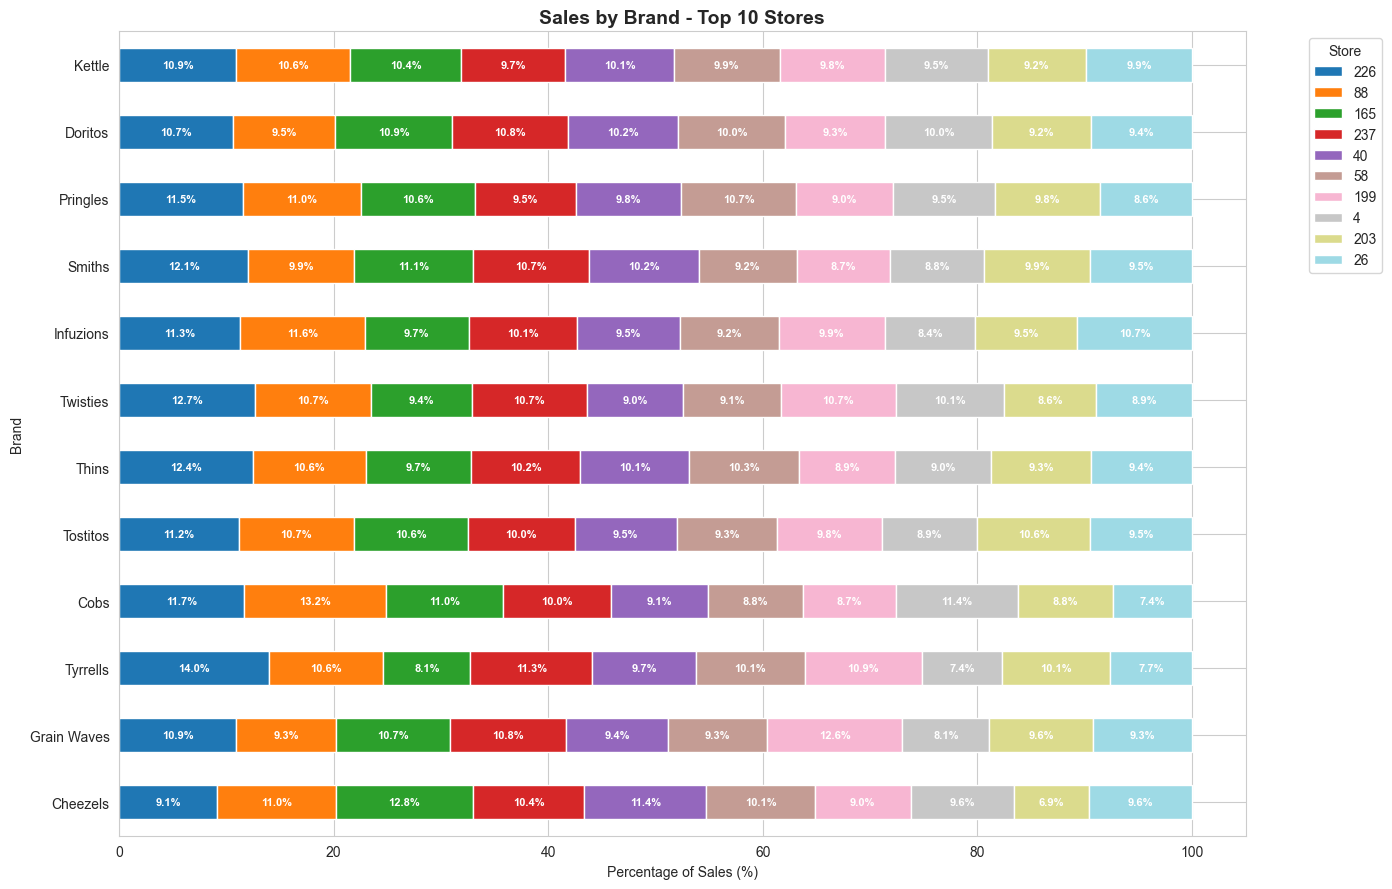

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Prepare data ---
store_sales = df.groupby(["STORE_NBR", "Brand"])["TOT_SALES"].sum().reset_index()

# Keep only top 10 stores by total sales
top_stores = store_sales.groupby("STORE_NBR")["TOT_SALES"].sum().nlargest(10).index
store_sales_top = store_sales[store_sales["STORE_NBR"].isin(top_stores)]

# Pivot for stacked bar
store_sales_pivot = store_sales_top.pivot(
    index="Brand", 
    columns="STORE_NBR", 
    values="TOT_SALES"
).fillna(0)

# Convert to percentages for 100% stacked bar
store_sales_percent = store_sales_pivot.div(store_sales_pivot.sum(axis=1), axis=0) * 100

# Sort brands by total sales (ascending for better layout)
store_sales_percent = store_sales_percent.loc[
    store_sales_pivot.sum(axis=1).sort_values(ascending=True).index
]

# Sort stores by total sales
store_order = store_sales_top.groupby("STORE_NBR")["TOT_SALES"].sum().sort_values(ascending=False).index
store_sales_percent = store_sales_percent[store_order]

# --- Plot ---
ax = store_sales_percent.plot(
    kind="barh", 
    stacked=True, 
    figsize=(14, 9),
    colormap="tab20"  # large palette for many stores
)

plt.title("Sales by Brand - Top 10 Stores", fontsize=14, fontweight="bold")
plt.xlabel("Percentage of Sales (%)")
plt.ylabel("Brand")

# Add percentage labels inside bars
for i, row in enumerate(store_sales_percent.values):
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 5:  # Show label only if >5%
            ax.text(cum_sum + val/2, i, f"{val:.1f}%", 
                    ha="center", va="center", fontsize=8, fontweight="bold", color="white")
        cum_sum += val

# Sorted legend (top 10 stores)
handles, labels = ax.get_legend_handles_labels()
sorted_labels = [str(s) for s in store_order]
sorted_handles = [handles[labels.index(str(l))] for l in sorted_labels]

ax.legend(sorted_handles, sorted_labels, title="Store", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


<h1 style="text-align: center; font-weight: bold;">Stores</h1>


## Top 10 Stores

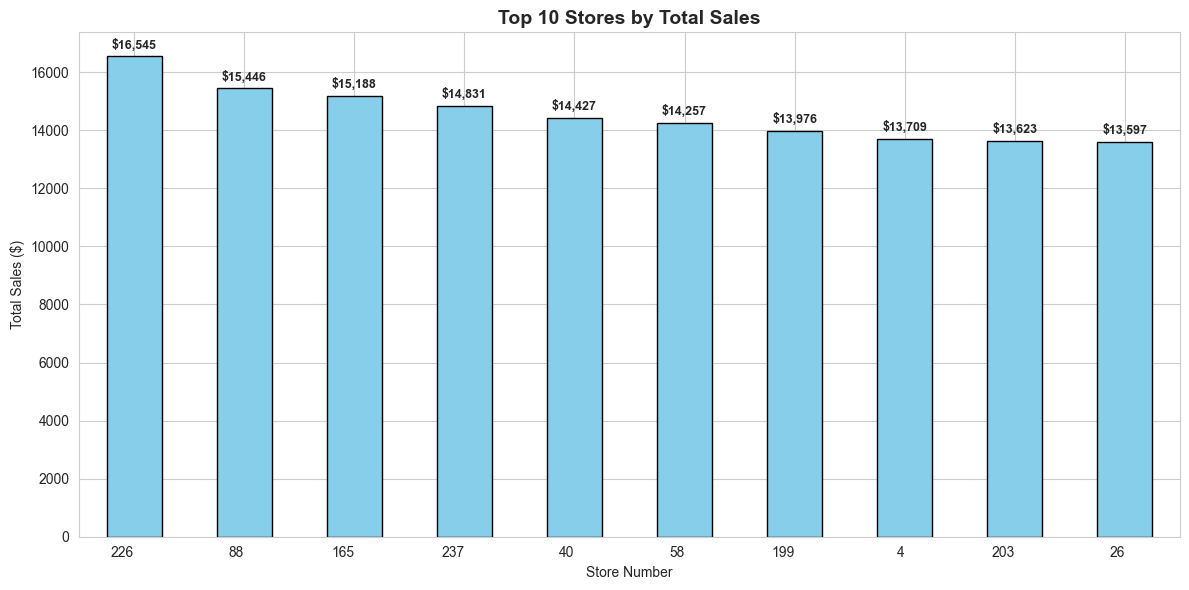

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Aggregate total sales by store ---
store_sales = df.groupby("STORE_NBR")["TOT_SALES"].sum().sort_values(ascending=False).head(10)

# --- Plot ---
plt.figure(figsize=(12, 6))
ax = store_sales.plot(
    kind="bar", 
    color="skyblue", 
    edgecolor="black"
)

plt.title("Top 10 Stores by Total Sales", fontsize=14, fontweight="bold")
plt.xlabel("Store Number")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=0, ha="right")

# Add labels on bars
for i, v in enumerate(store_sales.values):
    ax.text(i, v + 0.01 * store_sales.max(), f"${v:,.0f}", 
            ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()


# Store with LIFESTAGE

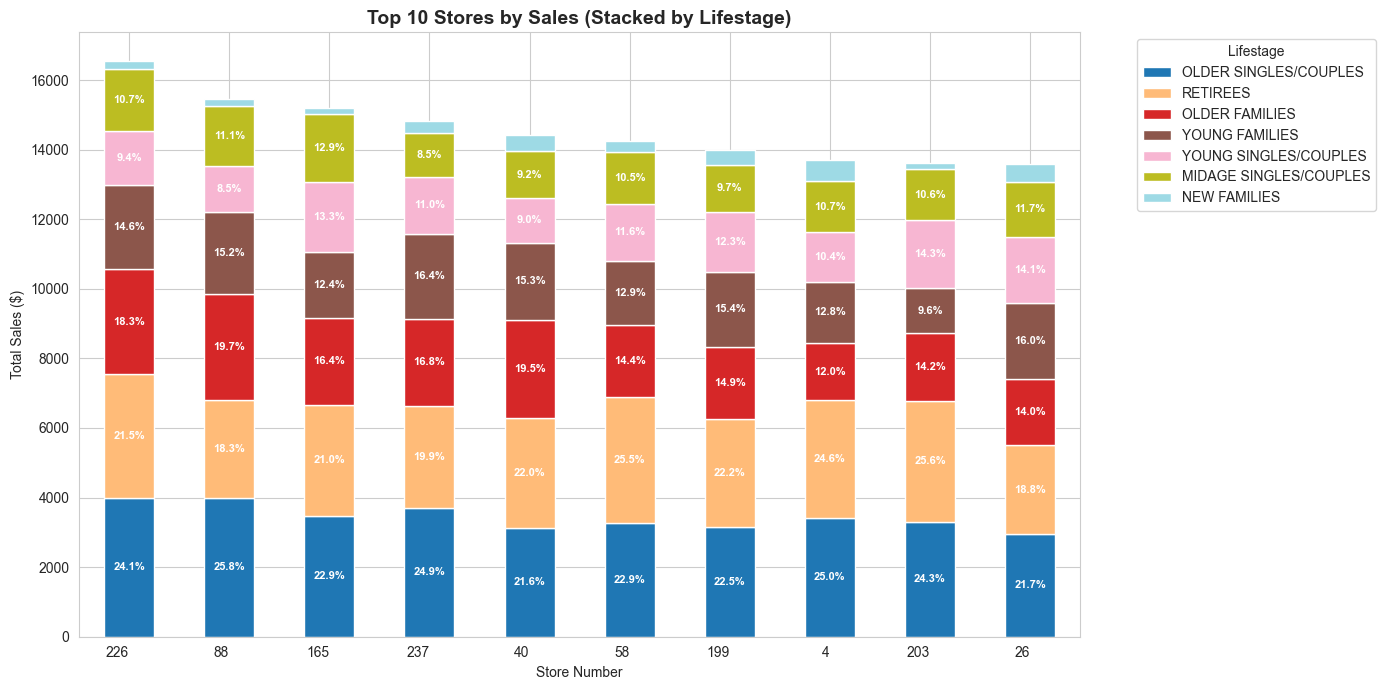

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Aggregate total sales by store and lifestage ---
store_lifestage_sales = (
    df.groupby(["STORE_NBR", "LIFESTAGE"])["TOT_SALES"]
    .sum()
    .reset_index()
)

# --- Find top 10 stores by total sales ---
top_stores = (
    store_lifestage_sales.groupby("STORE_NBR")["TOT_SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# --- Filter only top 10 stores ---
store_lifestage_sales = store_lifestage_sales[
    store_lifestage_sales["STORE_NBR"].isin(top_stores)
]

# Pivot for stacked bar chart
pivot_data = store_lifestage_sales.pivot(
    index="STORE_NBR",
    columns="LIFESTAGE",
    values="TOT_SALES"
).fillna(0)

# Sort stores by total sales
pivot_data = pivot_data.loc[
    pivot_data.sum(axis=1).sort_values(ascending=False).index
]

# --- Sort Lifestage (columns) by total sales contribution ---
lifestage_order = pivot_data.sum(axis=0).sort_values(ascending=False).index
pivot_data = pivot_data[lifestage_order]

# --- Plot ---
ax = pivot_data.plot(
    kind="bar",
    stacked=True,
    rot=0,
    figsize=(14, 7),
    colormap="tab20"
)

plt.title("Top 10 Stores by Sales (Stacked by Lifestage)", fontsize=14, fontweight="bold")
plt.xlabel("Store Number")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=0, ha="right")

# --- Add percentage labels inside bars ---
for i, row in enumerate(pivot_data.values):
    total = row.sum()
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 0:
            percent = (val / total) * 100
            if percent > 5:  # Show only if >5% for clarity
                ax.text(
                    i,
                    cum_sum + val / 2,
                    f"{percent:.1f}%",
                    ha="center",
                    va="center",
                    fontsize=8,
                    fontweight="bold",
                    color="white"
                )
        cum_sum += val

# --- Custom sorted legend ---
handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(l)] for l in lifestage_order]
ax.legend(sorted_handles, lifestage_order, title="Lifestage", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


## Store with PREIMUM

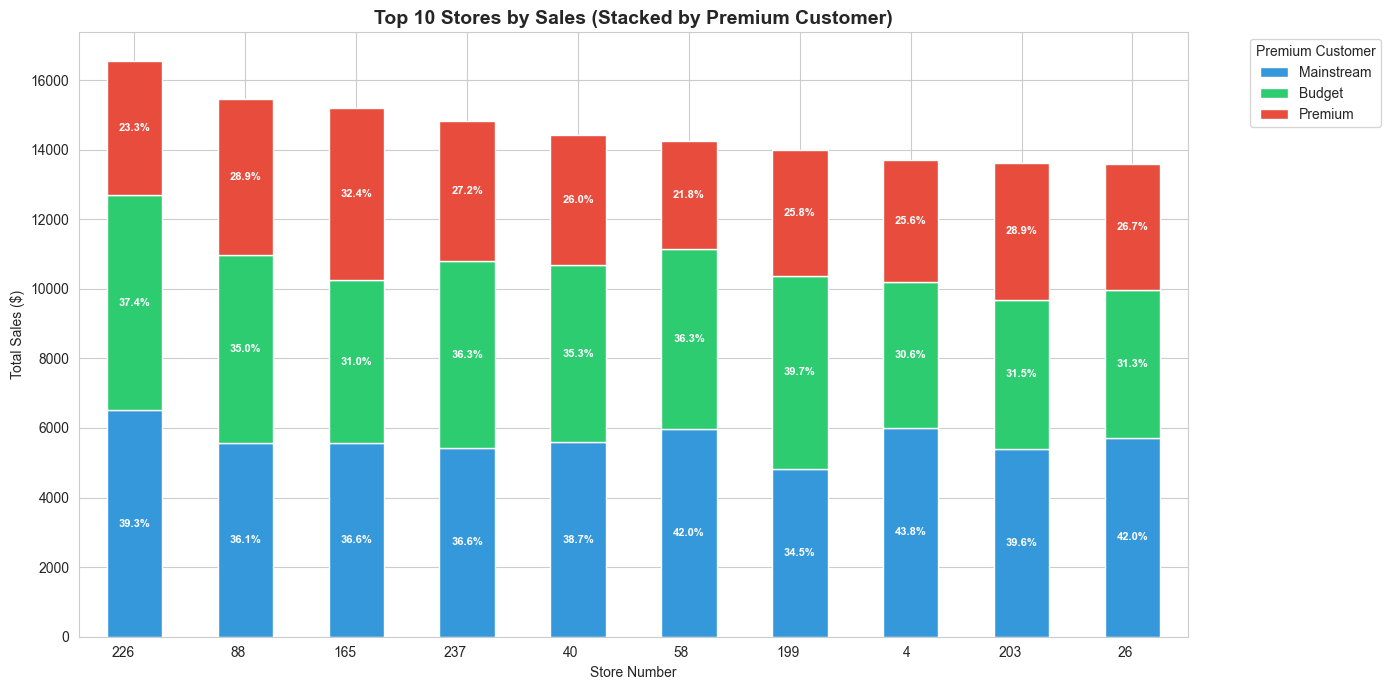

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Aggregate total sales by store and PREMIUM_CUSTOMER ---
store_premium_sales = (
    df.groupby(["STORE_NBR", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .reset_index()
)

# --- Find top 10 stores by total sales ---
top_stores = (
    store_premium_sales.groupby("STORE_NBR")["TOT_SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# --- Filter only top 10 stores ---
store_premium_sales = store_premium_sales[
    store_premium_sales["STORE_NBR"].isin(top_stores)
]

# Pivot for stacked bar chart
pivot_data = store_premium_sales.pivot(
    index="STORE_NBR",
    columns="PREMIUM_CUSTOMER",
    values="TOT_SALES"
).fillna(0)

# Sort stores by total sales
pivot_data = pivot_data.loc[
    pivot_data.sum(axis=1).sort_values(ascending=False).index
]

# --- Sort PREMIUM_CUSTOMER (columns) by total sales contribution ---
premium_order = pivot_data.sum(axis=0).sort_values(ascending=False).index
pivot_data = pivot_data[premium_order]

# --- Plot ---
ax = pivot_data.plot(
    kind="bar",
    stacked=True,
    rot=0,
    figsize=(14, 7),
    color=["#3498db", "#2ecc71", "#e74c3c"]  # Mainstream, Budget, Premium
)

plt.title("Top 10 Stores by Sales (Stacked by Premium Customer)", fontsize=14, fontweight="bold")
plt.xlabel("Store Number")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=0, ha="right")

# --- Add percentage labels inside bars ---
for i, row in enumerate(pivot_data.values):
    total = row.sum()
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 0:
            percent = (val / total) * 100
            if percent > 5:  # Show only if >5% for clarity
                ax.text(
                    i,
                    cum_sum + val / 2,
                    f"{percent:.1f}%",
                    ha="center",
                    va="center",
                    fontsize=8,
                    fontweight="bold",
                    color="white"
                )
        cum_sum += val

# --- Custom sorted legend ---
handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(l)] for l in premium_order]
ax.legend(sorted_handles, premium_order, title="Premium Customer", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


## Store with brand

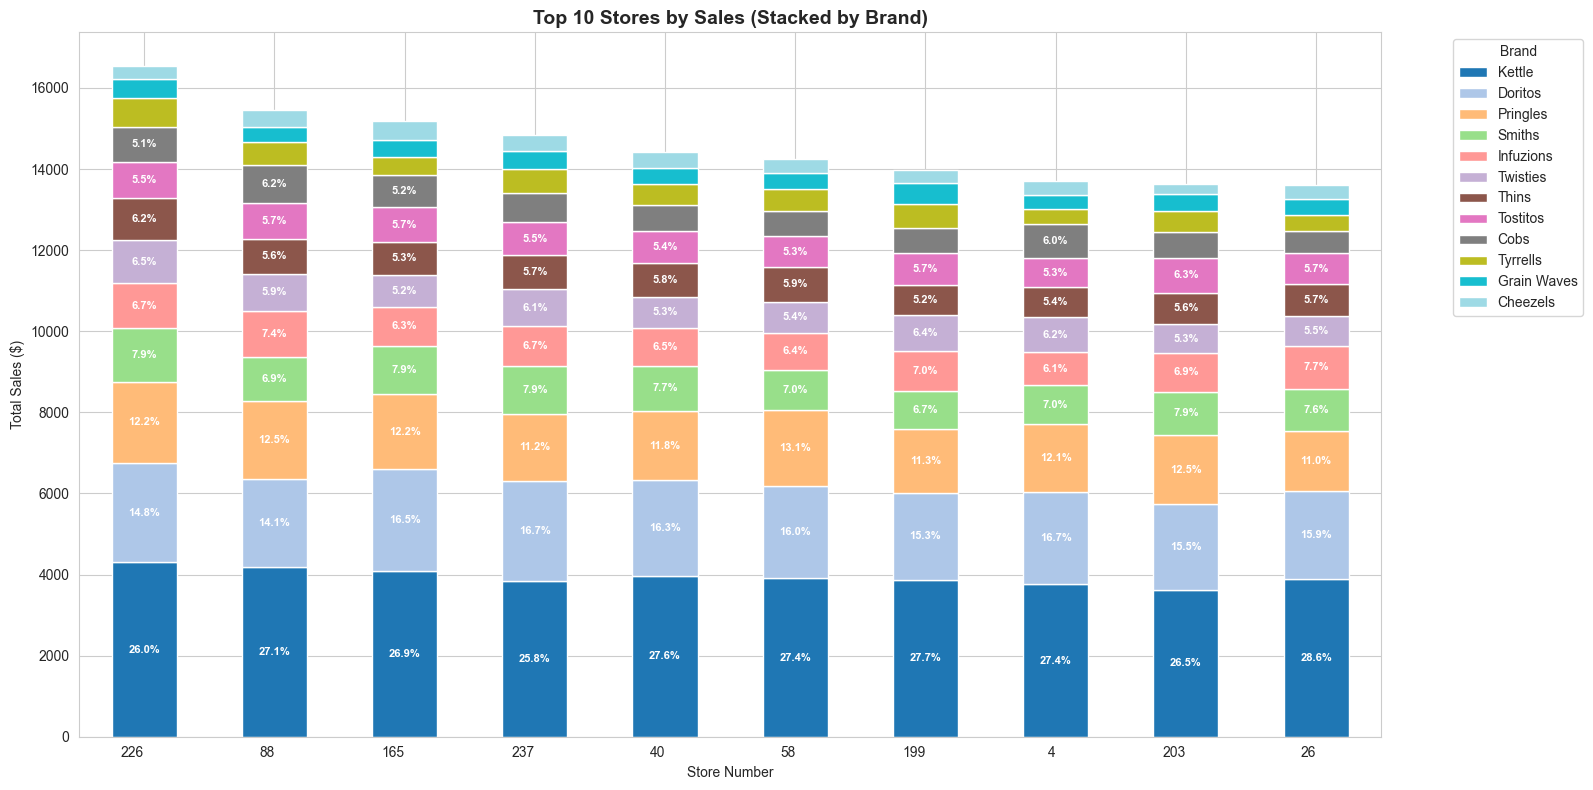

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Aggregate total sales by store and Brand ---
store_brand_sales = (
    df.groupby(["STORE_NBR", "Brand"])["TOT_SALES"]
    .sum()
    .reset_index()
)

# --- Find top 10 stores by total sales ---
top_stores = (
    store_brand_sales.groupby("STORE_NBR")["TOT_SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# --- Filter only top 10 stores ---
store_brand_sales = store_brand_sales[
    store_brand_sales["STORE_NBR"].isin(top_stores)
]

# Pivot for stacked bar chart
pivot_data = store_brand_sales.pivot(
    index="STORE_NBR",
    columns="Brand",
    values="TOT_SALES"
).fillna(0)

# Sort stores by total sales
pivot_data = pivot_data.loc[
    pivot_data.sum(axis=1).sort_values(ascending=False).index
]

# --- Sort brands (columns) by total sales contribution ---
brand_order = pivot_data.sum(axis=0).sort_values(ascending=False).index
pivot_data = pivot_data[brand_order]

# --- Plot ---
ax = pivot_data.plot(
    kind="bar",
    stacked=True,
    rot=0,
    figsize=(16, 8),
    colormap="tab20"   # More colors for many brands
)

plt.title("Top 10 Stores by Sales (Stacked by Brand)", fontsize=14, fontweight="bold")
plt.xlabel("Store Number")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=0, ha="right")

# --- Add percentage labels inside bars ---
for i, row in enumerate(pivot_data.values):
    total = row.sum()
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 0:
            percent = (val / total) * 100
            if percent > 5:  # Show only if >5% for clarity
                ax.text(
                    i,
                    cum_sum + val / 2,
                    f"{percent:.1f}%",
                    ha="center",
                    va="center",
                    fontsize=8,
                    fontweight="bold",
                    color="white"
                )
        cum_sum += val

# --- Custom sorted legend ---
handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(l)] for l in brand_order]
ax.legend(sorted_handles, brand_order, title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


## Trail Store with LIFESTAGE

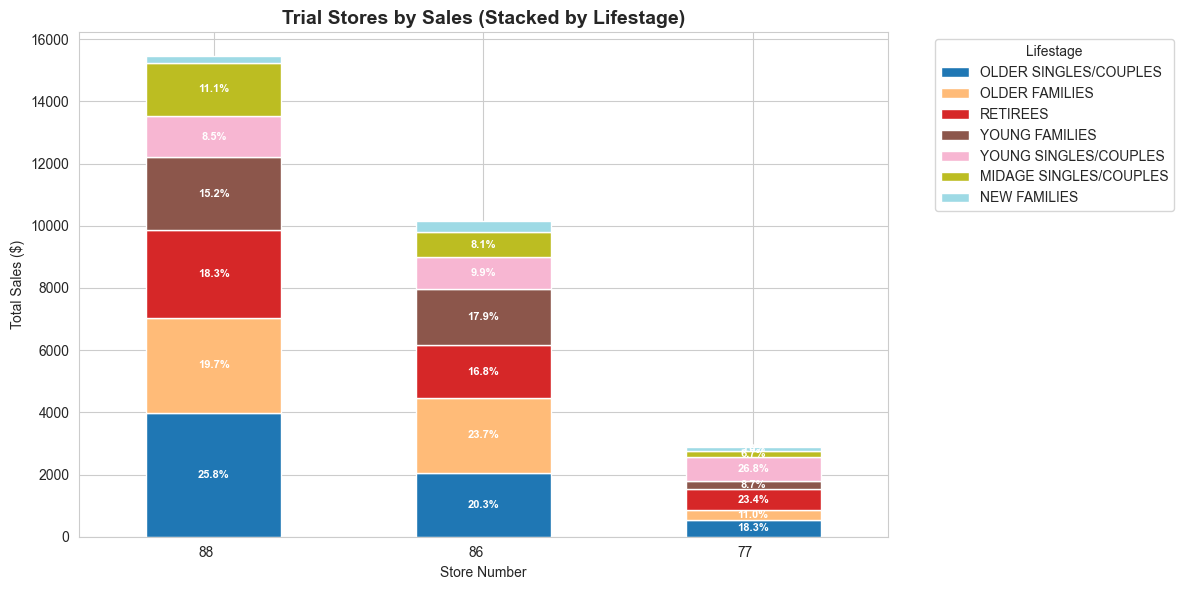

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Aggregate total sales by store and lifestage ---
store_lifestage_sales = (
    df.groupby(["STORE_NBR", "LIFESTAGE"])["TOT_SALES"]
    .sum()
    .reset_index()
)

# --- Define trial stores ---
trial_stores = [88, 86, 77]

# --- Filter only trial stores ---
store_lifestage_sales = store_lifestage_sales[
    store_lifestage_sales["STORE_NBR"].isin(trial_stores)
]

# Pivot for stacked bar chart
pivot_data = store_lifestage_sales.pivot(
    index="STORE_NBR",
    columns="LIFESTAGE",
    values="TOT_SALES"
).fillna(0)

# Sort stores by total sales
pivot_data = pivot_data.loc[
    pivot_data.sum(axis=1).sort_values(ascending=False).index
]

# --- Sort Lifestage (columns) by total sales contribution ---
lifestage_order = pivot_data.sum(axis=0).sort_values(ascending=False).index
pivot_data = pivot_data[lifestage_order]

# --- Plot ---
ax = pivot_data.plot(
    kind="bar",
    stacked=True,
    rot=0,
    figsize=(12, 6),
    colormap="tab20"
)

plt.title("Trial Stores by Sales (Stacked by Lifestage)", fontsize=14, fontweight="bold")
plt.xlabel("Store Number")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=0, ha="right")

# --- Add percentage labels inside bars ---
for i, row in enumerate(pivot_data.values):
    total = row.sum()
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 0:
            percent = (val / total) * 100
            if percent > 5:  # Show only if >5% for clarity
                ax.text(
                    i,
                    cum_sum + val / 2,
                    f"{percent:.1f}%",
                    ha="center",
                    va="center",
                    fontsize=8,
                    fontweight="bold",
                    color="white"
                )
        cum_sum += val

# --- Custom sorted legend ---
handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(l)] for l in lifestage_order]
ax.legend(sorted_handles, lifestage_order, title="Lifestage", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


## Trail Store with PREIMIUM

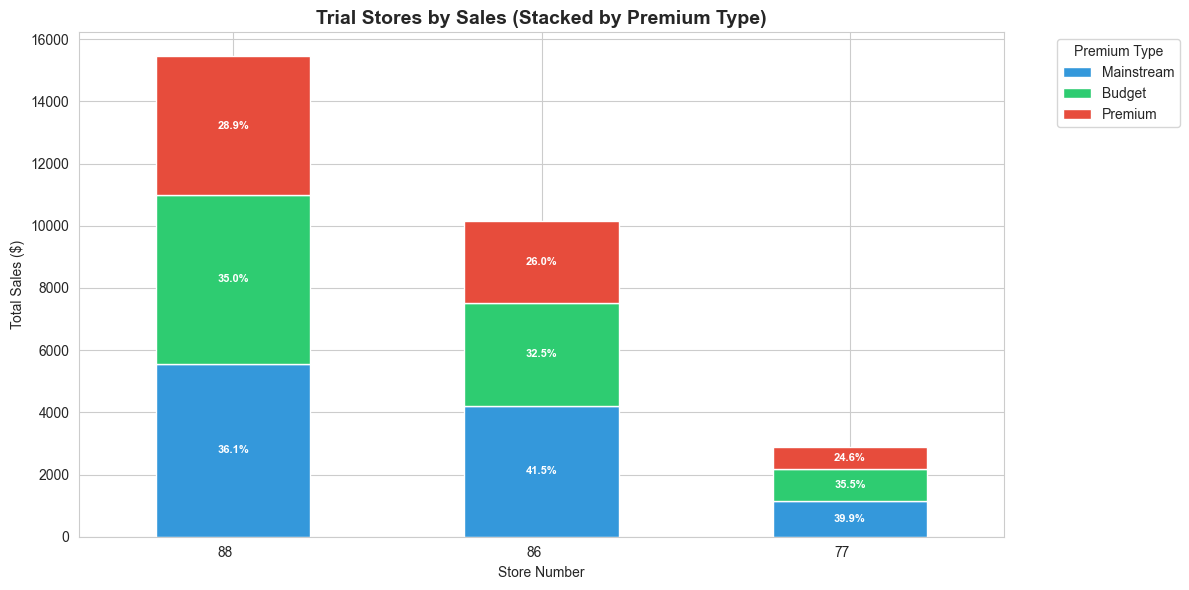

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Aggregate total sales by store and premium customer ---
store_premium_sales = (
    df.groupby(["STORE_NBR", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .reset_index()
)

# --- Define trial stores ---
trial_stores = [88, 86, 77]

# --- Filter only trial stores ---
store_premium_sales = store_premium_sales[
    store_premium_sales["STORE_NBR"].isin(trial_stores)
]

# Pivot for stacked bar chart
pivot_data = store_premium_sales.pivot(
    index="STORE_NBR",
    columns="PREMIUM_CUSTOMER",
    values="TOT_SALES"
).fillna(0)

# Sort stores by total sales
pivot_data = pivot_data.loc[
    pivot_data.sum(axis=1).sort_values(ascending=False).index
]

# --- Sort Premium types (columns) by total sales contribution ---
premium_order = pivot_data.sum(axis=0).sort_values(ascending=False).index
pivot_data = pivot_data[premium_order]

# --- Plot ---
ax = pivot_data.plot(
    kind="bar",
    stacked=True,
    rot=0,
    figsize=(12, 6),
    color=["#3498db", "#2ecc71", "#e74c3c"]  # Mainstream, Budget, Premium
)

plt.title("Trial Stores by Sales (Stacked by Premium Type)", fontsize=14, fontweight="bold")
plt.xlabel("Store Number")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=0, ha="right")

# --- Add percentage labels inside bars ---
for i, row in enumerate(pivot_data.values):
    total = row.sum()
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 0:
            percent = (val / total) * 100
            if percent > 5:  # Show only if >5% for clarity
                ax.text(
                    i,
                    cum_sum + val / 2,
                    f"{percent:.1f}%",
                    ha="center",
                    va="center",
                    fontsize=8,
                    fontweight="bold",
                    color="white"
                )
        cum_sum += val

# --- Custom sorted legend ---
handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(l)] for l in premium_order]
ax.legend(sorted_handles, premium_order, title="Premium Type", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


## Trail Store with Brand

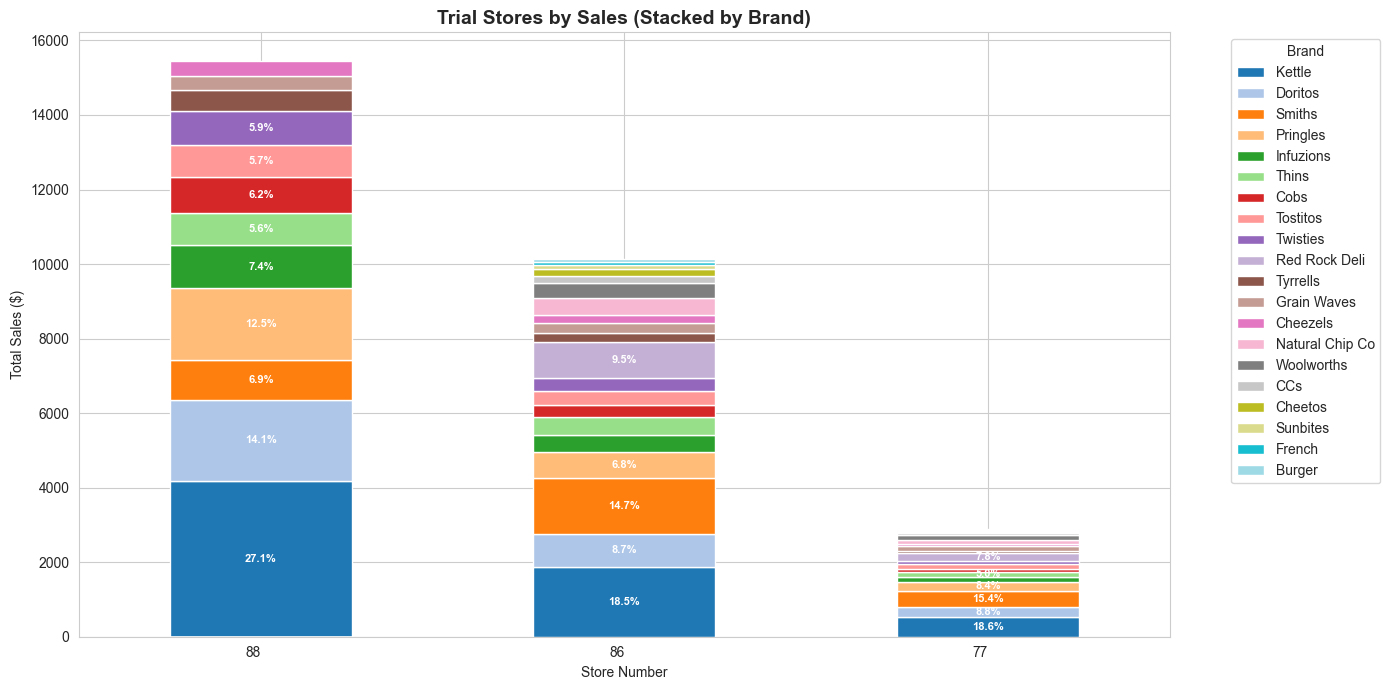

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Aggregate total sales by store and brand ---
store_brand_sales = (
    df.groupby(["STORE_NBR", "Brand"])["TOT_SALES"]
    .sum()
    .reset_index()
)

# --- Define trial stores ---
trial_stores = [88, 86, 77]

# --- Filter only trial stores ---
store_brand_sales = store_brand_sales[
    store_brand_sales["STORE_NBR"].isin(trial_stores)
]

# Pivot for stacked bar chart
pivot_data = store_brand_sales.pivot(
    index="STORE_NBR",
    columns="Brand",
    values="TOT_SALES"
).fillna(0)

# Sort stores by total sales
pivot_data = pivot_data.loc[
    pivot_data.sum(axis=1).sort_values(ascending=False).index
]

# --- Sort brands (columns) by total sales contribution ---
brand_order = pivot_data.sum(axis=0).sort_values(ascending=False).index
pivot_data = pivot_data[brand_order]

# --- Plot ---
ax = pivot_data.plot(
    kind="bar",
    stacked=True,
    rot=0,
    figsize=(14, 7),
    colormap="tab20"  # large palette for many brands
)

plt.title("Trial Stores by Sales (Stacked by Brand)", fontsize=14, fontweight="bold")
plt.xlabel("Store Number")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=0, ha="right")

# --- Add percentage labels inside bars ---
for i, row in enumerate(pivot_data.values):
    total = row.sum()
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 0:
            percent = (val / total) * 100
            if percent > 5:  # Show only if >5% for clarity
                ax.text(
                    i,
                    cum_sum + val / 2,
                    f"{percent:.1f}%",
                    ha="center",
                    va="center",
                    fontsize=8,
                    fontweight="bold",
                    color="white"
                )
        cum_sum += val

# --- Custom sorted legend ---
handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(l)] for l in brand_order]
ax.legend(sorted_handles, brand_order, title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


<h1 style="text-align: center; font-weight: bold;">Sales</h1>


C:\Users\DELL\AppData\Local\Temp\ipykernel_22016\1000782018.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key="DATE", freq="M"))["TOT_SALES"].sum()


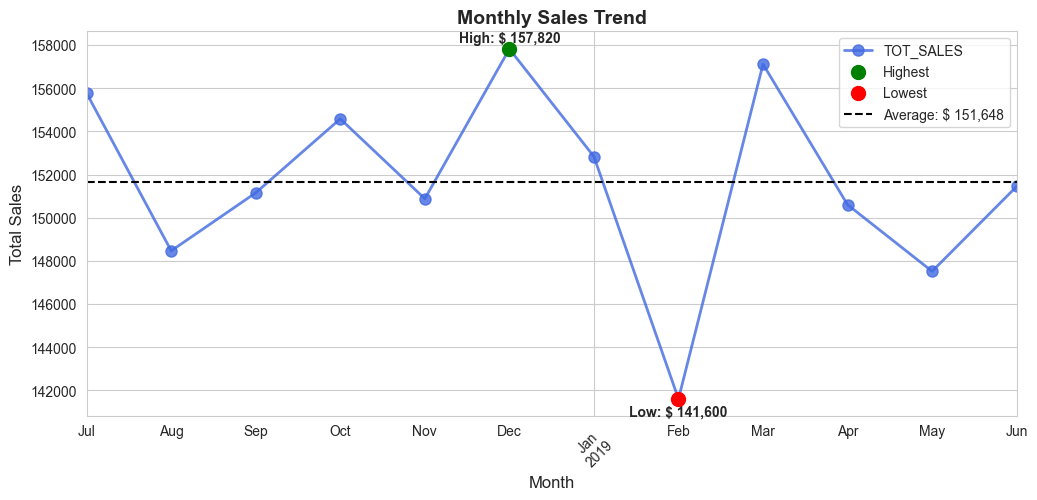

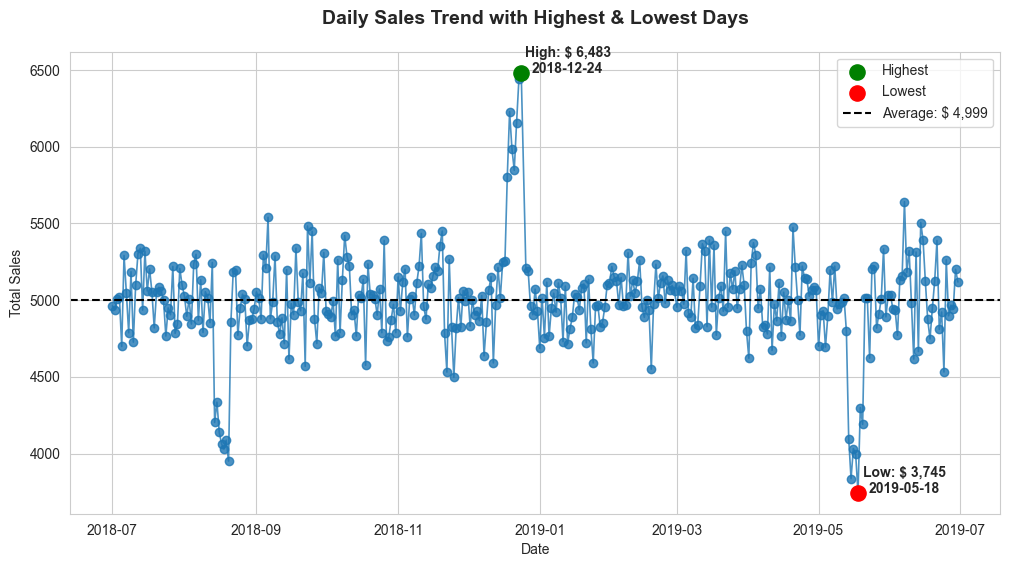

In [80]:
# -----------------------------
# 5. Time-based Analysis
# -----------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Apply Seaborn style
sns.set_style("whitegrid")

# Convert DATE to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Monthly revenue
monthly_sales = df.groupby(pd.Grouper(key="DATE", freq="M"))["TOT_SALES"].sum()

plt.figure(figsize=(12,5))
ax = monthly_sales.plot(
    marker="o", 
    markersize=8, 
    linewidth=2, 
    color="royalblue", 
    alpha=0.8
)

plt.title("Monthly Sales Trend", fontsize=14, fontweight="bold")
plt.ylabel("Total Sales", fontsize=12)
plt.xlabel("Month", fontsize=12)

# Detect highest and lowest month
highest_month = monthly_sales.idxmax()
lowest_month = monthly_sales.idxmin()
highest_value = monthly_sales.max()
lowest_value = monthly_sales.min()

# Highlight highest month
plt.scatter(highest_month, highest_value, color="green", s=100, zorder=5, label="Highest")
ax.annotate(f"High: $ {highest_value:,.0f}",
            xy=(highest_month, highest_value),
            xytext=(highest_month, highest_value + 0.002 * monthly_sales.max()),
            ha="center", fontsize=10, fontweight="bold",
            arrowprops=dict(facecolor="green", arrowstyle="->"))

# Highlight lowest month
plt.scatter(lowest_month, lowest_value, color="red", s=100, zorder=5, label="Lowest")
ax.annotate(f"Low: $ {lowest_value:,.0f}",
            xy=(lowest_month, lowest_value),
            xytext=(lowest_month, lowest_value - 0.005 * monthly_sales.max()),
            ha="center", fontsize=10, fontweight="bold",
            arrowprops=dict(facecolor="red", arrowstyle="->"))


# Add average monthly sales line
avg_sales = monthly_sales.mean()
ax.axhline(avg_sales, color="black", linestyle="--", linewidth=1.5, label=f"Average: $ {avg_sales:,.0f}")


# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legend
plt.legend()

plt.show()

# -----------------------------
# Highest & Lowest Day Analysis
# -----------------------------

# Daily sales
daily_sales = df.groupby("DATE")["TOT_SALES"].sum()

# Calculate average sales
avg_sales = daily_sales.mean()

# Get highest and lowest
highest_day = daily_sales.idxmax()
lowest_day = daily_sales.idxmin()
highest_day_value = daily_sales.max()
lowest_day_value = daily_sales.min()

# Make sure they are datetime objects
highest_day = pd.to_datetime(highest_day)
lowest_day = pd.to_datetime(lowest_day)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(daily_sales.index, daily_sales.values, marker="o", linewidth=1.2, alpha=0.8)

# Highlight highest
ax.scatter(highest_day, highest_day_value, color="green", s=120, zorder=5, label="Highest")
ax.annotate(f"High: $ {highest_day_value:,.0f}\n{highest_day.strftime('%Y-%m-%d')}",
            xy=(highest_day, highest_day_value),
            # xytext=(highest_day, highest_day_value + 0.008 * daily_sales.max()),
            xytext=(highest_day + pd.Timedelta(days=20), highest_day_value),
            ha="center", fontsize=10, fontweight="bold",
            arrowprops=dict(facecolor="green", arrowstyle="->"))

# Highlight lowest
ax.scatter(lowest_day, lowest_day_value, color="red", s=120, zorder=5, label="Lowest")
ax.annotate(f"Low: $ {lowest_day_value:,.0f}\n{lowest_day.strftime('%Y-%m-%d')}",
            xy=(lowest_day, lowest_day_value),
            # xytext=(lowest_day, lowest_day_value + 0.008 * daily_sales.max()),
            xytext=(lowest_day + pd.Timedelta(days=20), lowest_day_value),  # shift 10 days to the right
            ha="center", fontsize=10, fontweight="bold",
            arrowprops=dict(facecolor="red", arrowstyle="->"))


# Add average line
ax.axhline(avg_sales, color="black", linestyle="--", linewidth=1.5, label=f"Average: $ {avg_sales:,.0f}")


ax.set_title("Daily Sales Trend with Highest & Lowest Days", fontsize=14, fontweight="bold", pad=20)
ax.set_xlabel("Date")
ax.set_ylabel("Total Sales")
ax.legend()
plt.show()



## Sales over LIFESTAGE

C:\Users\DELL\AppData\Local\Temp\ipykernel_22016\1234985238.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(key="DATE", freq="M"), "LIFESTAGE"])["TOT_SALES"]


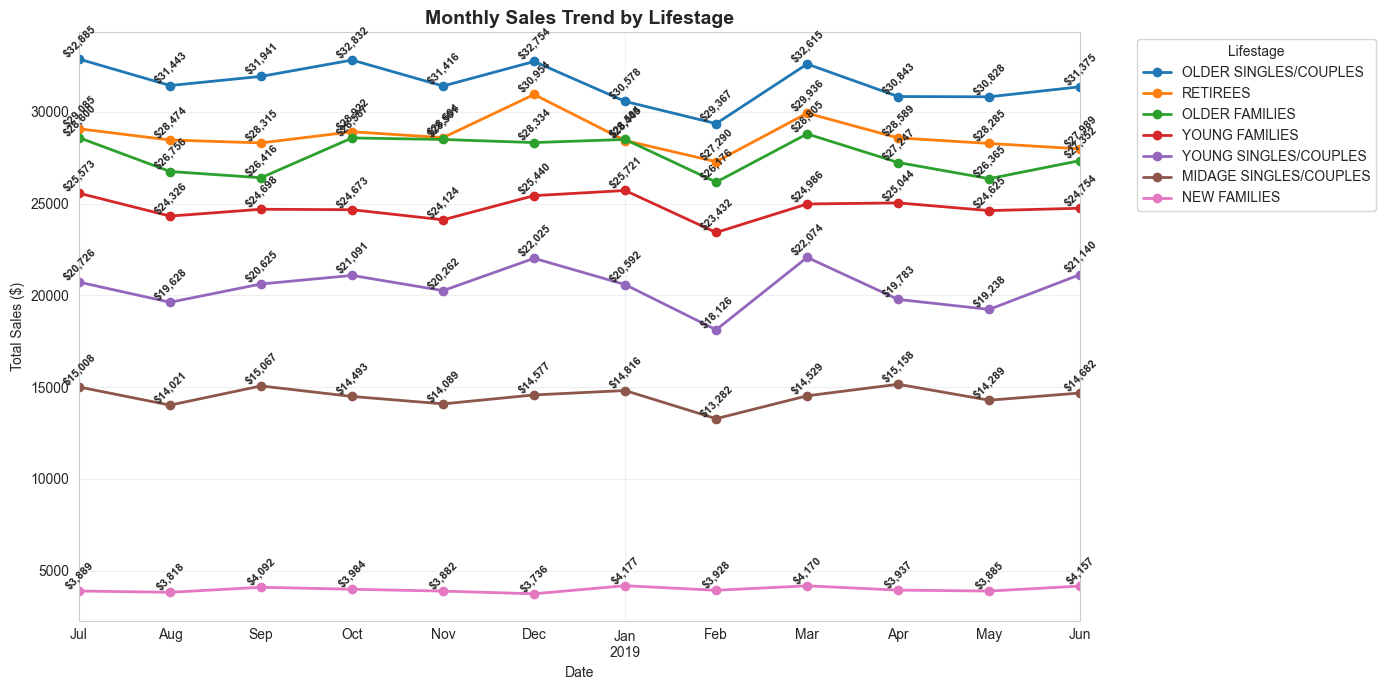

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Ensure DATE is datetime ---
df["DATE"] = pd.to_datetime(df["DATE"])

# --- Aggregate sales over time by LIFESTAGE ---
sales_time_lifestage = (
    df.groupby([pd.Grouper(key="DATE", freq="M"), "LIFESTAGE"])["TOT_SALES"]
    .sum()
    .reset_index()
)

# --- Pivot for plotting ---
pivot_data = sales_time_lifestage.pivot(
    index="DATE", 
    columns="LIFESTAGE", 
    values="TOT_SALES"
).fillna(0)

# --- Sort legend by total sales ---
totals = pivot_data.sum().sort_values(ascending=False)
pivot_data = pivot_data[totals.index]

# --- Plot ---
plt.figure(figsize=(14, 7))
ax = pivot_data.plot(ax=plt.gca(), linewidth=2, marker="o")

plt.title("Monthly Sales Trend by Lifestage", fontsize=14, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.grid(alpha=0.3)

# --- Custom sorted legend ---
handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(l)] for l in totals.index]
ax.legend(sorted_handles, totals.index, title="Lifestage", bbox_to_anchor=(1.05, 1), loc="upper left")

# --- Add data labels ---
for line in ax.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        if y > 0:  # avoid labeling empty points
            ax.text(
                x, y, f"${y:,.0f}", 
                ha="center", va="bottom", fontsize=8, fontweight="bold", rotation=45
            )

plt.tight_layout()
plt.show()


## Sales Over PREIMIUM

C:\Users\DELL\AppData\Local\Temp\ipykernel_22016\1787893678.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(key="DATE", freq="M"), "PREMIUM_CUSTOMER"])["TOT_SALES"]


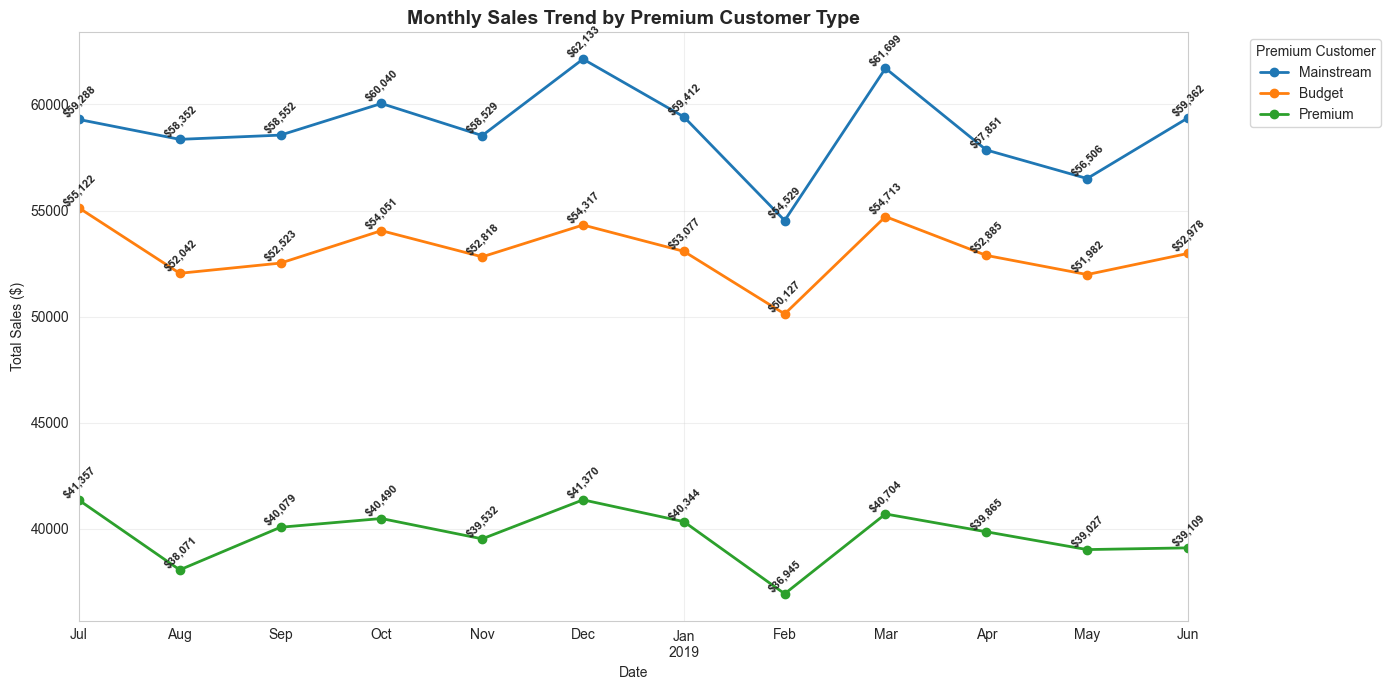

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Ensure DATE is datetime ---
df["DATE"] = pd.to_datetime(df["DATE"])

# --- Aggregate sales over time by PREMIUM_CUSTOMER ---
sales_time_premium = (
    df.groupby([pd.Grouper(key="DATE", freq="M"), "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .reset_index()
)

# --- Pivot for plotting ---
pivot_data = sales_time_premium.pivot(
    index="DATE", 
    columns="PREMIUM_CUSTOMER", 
    values="TOT_SALES"
).fillna(0)

# --- Sort legend by total sales ---
totals = pivot_data.sum().sort_values(ascending=False)
pivot_data = pivot_data[totals.index]

# --- Plot ---
plt.figure(figsize=(14, 7))
ax = pivot_data.plot(ax=plt.gca(), linewidth=2, marker="o")

plt.title("Monthly Sales Trend by Premium Customer Type", fontsize=14, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.grid(alpha=0.3)

# Custom sorted legend
handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(l)] for l in totals.index]
ax.legend(sorted_handles, totals.index, title="Premium Customer", bbox_to_anchor=(1.05, 1), loc="upper left")

# --- Add data labels ---
for line in ax.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        if y > 0:  # avoid labeling empty points
            ax.text(
                x, y, f"${y:,.0f}", 
                ha="center", va="bottom", fontsize=8, fontweight="bold", rotation=45
            )

plt.tight_layout()
plt.show()


 
<h1 style="text-align: center; font-weight: bold;">Pack Size</h1>


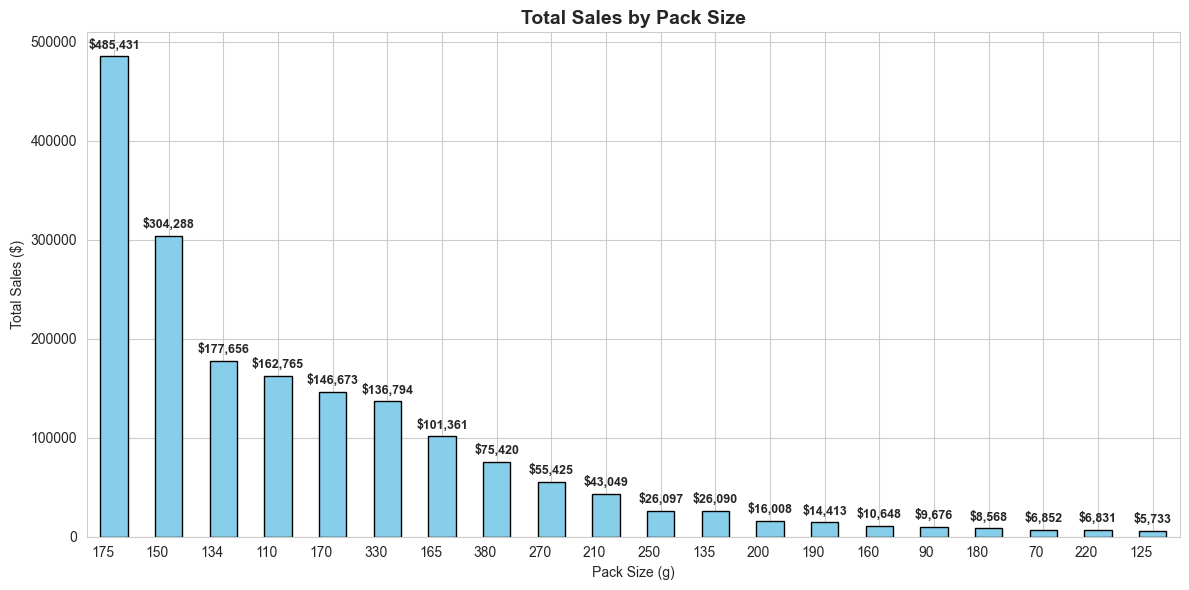

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Aggregate sales by Pack Size ---
pack_sales = (
    df.groupby("Pack_Size (g)")["TOT_SALES"]
    .sum()
    .sort_index()
).sort_values(ascending=False)

# --- Plot ---
plt.figure(figsize=(12, 6))
ax = pack_sales.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Total Sales by Pack Size", fontsize=14, fontweight="bold")
plt.xlabel("Pack Size (g)")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=0, ha="right")

# Add labels on bars
for i, v in enumerate(pack_sales.values):
    ax.text(i, v + 0.01 * pack_sales.max(), f"${v:,.0f}",
            ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()


## Pack Size Over PREIMIUM

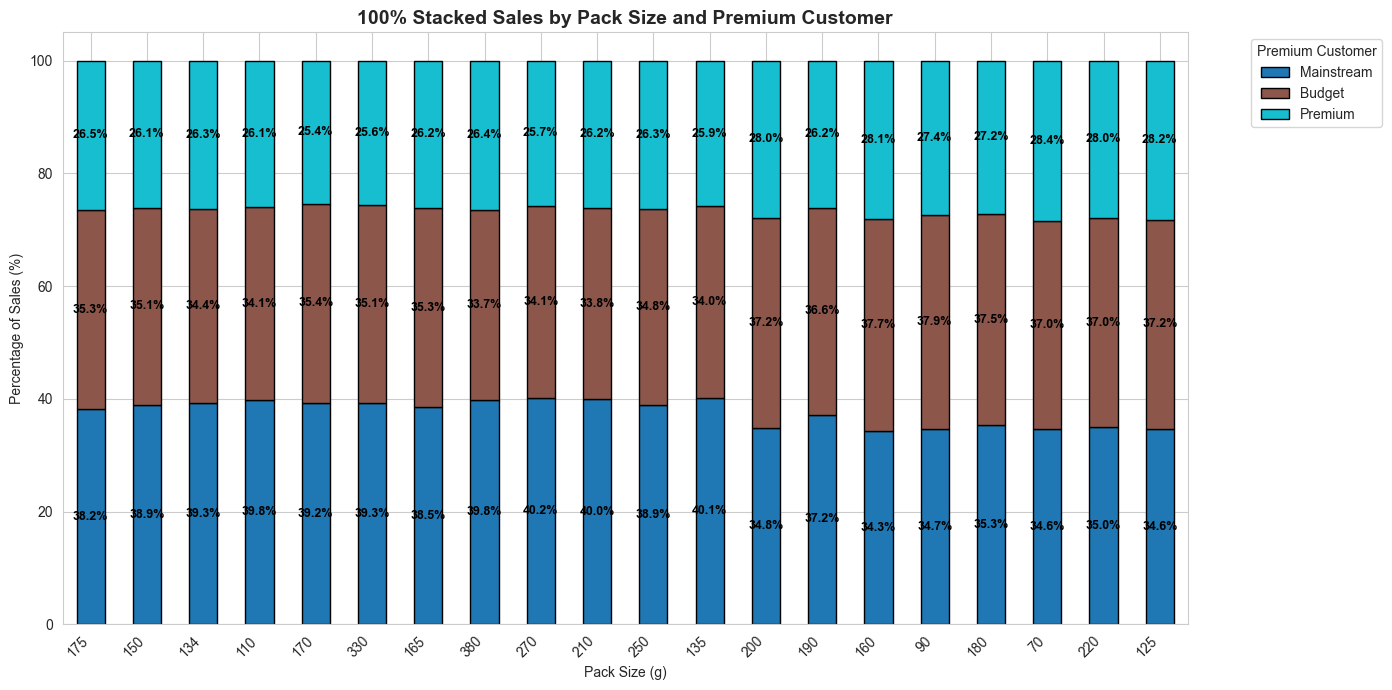

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Aggregate sales by Pack Size and Premium Customer ---
pack_premium_sales = (
    df.groupby(["Pack_Size (g)", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .reset_index()
)

# Pivot for stacked bar
pivot_data = pack_premium_sales.pivot(
    index="Pack_Size (g)",
    columns="PREMIUM_CUSTOMER",
    values="TOT_SALES"
).fillna(0)

# --- Sort Pack Sizes by total sales (descending) ---
pivot_data = pivot_data.loc[pivot_data.sum(axis=1).sort_values(ascending=False).index]

# --- Sort Premium Customer groups by total sales (descending) ---
premium_order = pivot_data.sum(axis=0).sort_values(ascending=False).index
pivot_data = pivot_data[premium_order]

# --- Convert to percentages (100% stacked) ---
pivot_percent = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# --- Plot ---
ax = pivot_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    colormap="tab10",
    edgecolor="black"
)

plt.title("100% Stacked Sales by Pack Size and Premium Customer", fontsize=14, fontweight="bold")
plt.xlabel("Pack Size (g)")
plt.ylabel("Percentage of Sales (%)")
plt.xticks(rotation=45, ha="right")

# Add percentage labels inside bars
for i, row in enumerate(pivot_percent.values):
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 5:  # Show only if >5% for clarity
            ax.text(
                i,
                cum_sum + val / 2,
                f"{val:.1f}%",
                ha="center",
                va="center",
                fontsize=9,
                fontweight="bold",
                color="black"
            )
        cum_sum += val

# --- Custom sorted legend ---
handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(l)] for l in premium_order]
ax.legend(sorted_handles, premium_order, title="Premium Customer", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


## Pack Size Over LIFESTAGE 

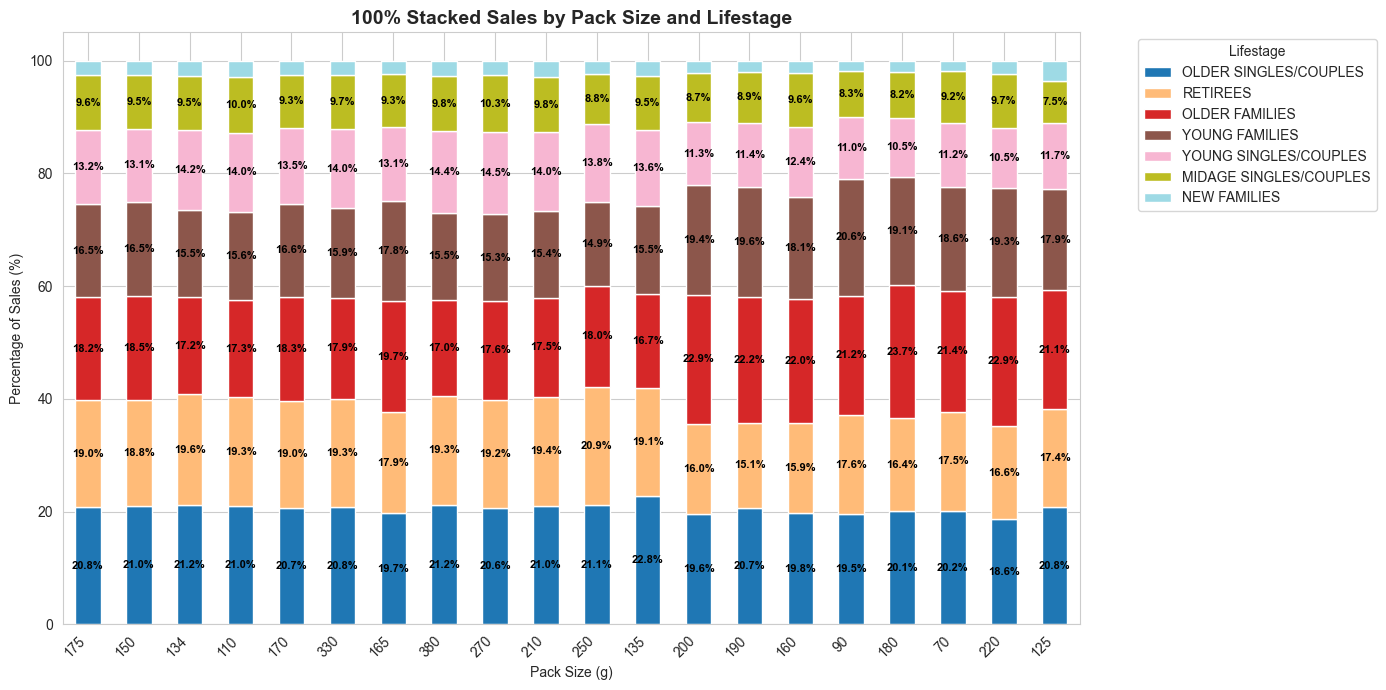

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Prepare data ---
pack_sales = df.groupby(["Pack_Size (g)", "LIFESTAGE"])["TOT_SALES"].sum().reset_index()

# Pivot for stacked bar
pack_sales_pivot = pack_sales.pivot(
    index="Pack_Size (g)",
    columns="LIFESTAGE",
    values="TOT_SALES"
).fillna(0)

# Sort pack sizes by total sales (descending)
pack_sales_pivot = pack_sales_pivot.loc[
    pack_sales_pivot.sum(axis=1).sort_values(ascending=False).index
]

# Sort Lifestages (columns) by overall contribution (descending)
lifestage_order = pack_sales_pivot.sum(axis=0).sort_values(ascending=False).index
pack_sales_pivot = pack_sales_pivot[lifestage_order]

# Convert to percentages (100% stacked)
pack_sales_percent = pack_sales_pivot.div(pack_sales_pivot.sum(axis=1), axis=0) * 100

# --- Plot ---
ax = pack_sales_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    colormap="tab20"
)

plt.title("100% Stacked Sales by Pack Size and Lifestage", fontsize=14, fontweight="bold")
plt.xlabel("Pack Size (g)")
plt.ylabel("Percentage of Sales (%)")
plt.xticks(rotation=45, ha="right")

# Add percentage labels inside bars
for i, row in enumerate(pack_sales_percent.values):
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 5:  # Only label segments >5% for clarity
            ax.text(
                i,
                cum_sum + val / 2,
                f"{val:.1f}%",
                ha="center",
                va="center",
                fontsize=8,
                fontweight="bold",
                color="black"
            )
        cum_sum += val

# --- Sorted legend ---
handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(l)] for l in lifestage_order]
ax.legend(sorted_handles, lifestage_order, title="Lifestage", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


## Pack Size Over Brand

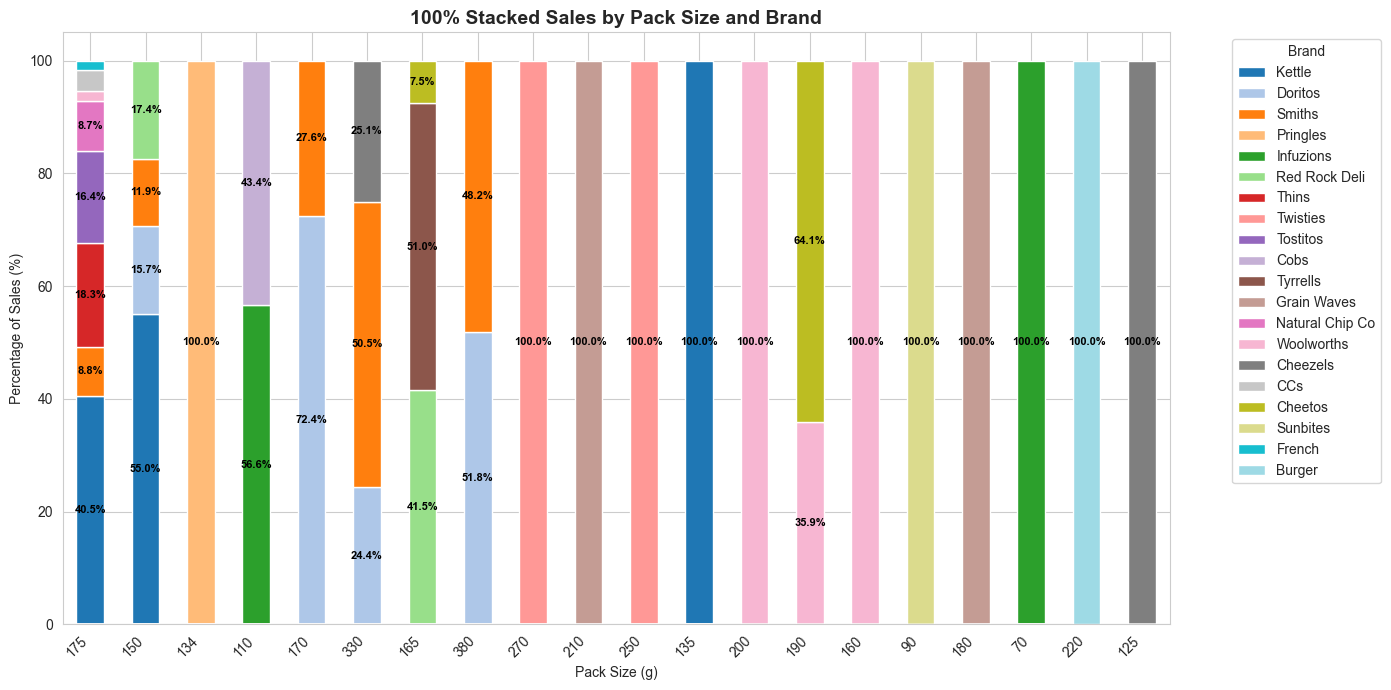

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Prepare data ---
pack_sales = df.groupby(["Pack_Size (g)", "Brand"])["TOT_SALES"].sum().reset_index()

# Pivot for stacked bar
pack_sales_pivot = pack_sales.pivot(
    index="Pack_Size (g)",
    columns="Brand",
    values="TOT_SALES"
).fillna(0)

# Sort pack sizes by total sales (descending)
pack_sales_pivot = pack_sales_pivot.loc[
    pack_sales_pivot.sum(axis=1).sort_values(ascending=False).index
]

# Sort brands (columns) by overall contribution (descending)
brand_order = pack_sales_pivot.sum(axis=0).sort_values(ascending=False).index
pack_sales_pivot = pack_sales_pivot[brand_order]

# Convert to percentages (100% stacked)
pack_sales_percent = pack_sales_pivot.div(pack_sales_pivot.sum(axis=1), axis=0) * 100

# --- Plot ---
ax = pack_sales_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    colormap="tab20"
)

plt.title("100% Stacked Sales by Pack Size and Brand", fontsize=14, fontweight="bold")
plt.xlabel("Pack Size (g)")
plt.ylabel("Percentage of Sales (%)")
plt.xticks(rotation=45, ha="right")

# Add percentage labels inside bars
for i, row in enumerate(pack_sales_percent.values):
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 5:  # Only label segments >5% for clarity
            ax.text(
                i,
                cum_sum + val / 2,
                f"{val:.1f}%",
                ha="center",
                va="center",
                fontsize=8,
                fontweight="bold",
                color="black"
            )
        cum_sum += val

# --- Sorted legend ---
handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(b)] for b in brand_order]
ax.legend(sorted_handles, brand_order, title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


## Pack Size Over Store

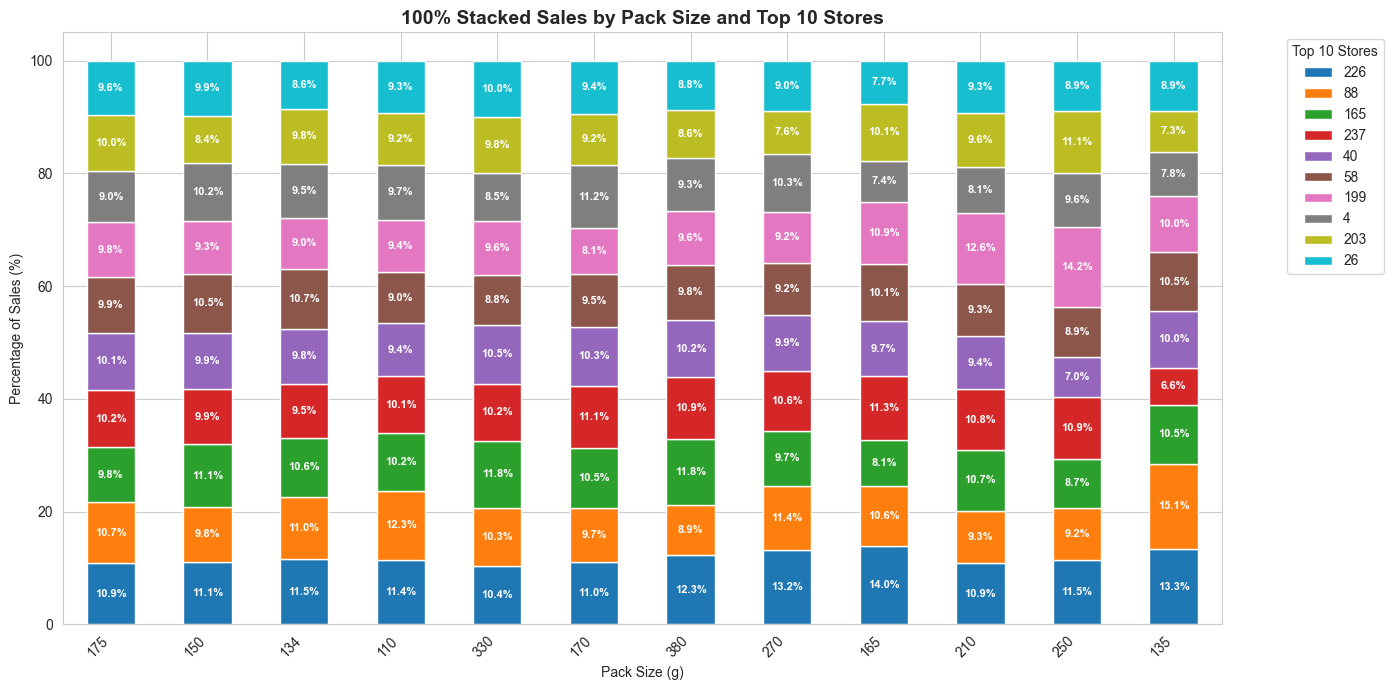

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Prepare data ---
pack_sales = df.groupby(["Pack_Size (g)", "STORE_NBR"])["TOT_SALES"].sum().reset_index()

# Find top 10 stores by total sales
top_stores = (
    pack_sales.groupby("STORE_NBR")["TOT_SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter only top 10 stores
pack_sales = pack_sales[pack_sales["STORE_NBR"].isin(top_stores)]

# Pivot for stacked bar
pack_sales_pivot = pack_sales.pivot(
    index="Pack_Size (g)",
    columns="STORE_NBR",
    values="TOT_SALES"
).fillna(0)

# Sort pack sizes by total sales (descending)
pack_sales_pivot = pack_sales_pivot.loc[
    pack_sales_pivot.sum(axis=1).sort_values(ascending=False).index
]

# Sort stores (columns) by overall contribution (descending)
store_order = pack_sales_pivot.sum(axis=0).sort_values(ascending=False).index
pack_sales_pivot = pack_sales_pivot[store_order]

# Convert to percentages (100% stacked)
pack_sales_percent = pack_sales_pivot.div(pack_sales_pivot.sum(axis=1), axis=0) * 100

# --- Plot ---
ax = pack_sales_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    colormap="tab10"
)

plt.title("100% Stacked Sales by Pack Size and Top 10 Stores", fontsize=14, fontweight="bold")
plt.xlabel("Pack Size (g)")
plt.ylabel("Percentage of Sales (%)")
plt.xticks(rotation=45, ha="right")

# Add percentage labels inside bars
for i, row in enumerate(pack_sales_percent.values):
    cum_sum = 0
    for j, val in enumerate(row):
        if val > 5:  # Only label segments >5% for clarity
            ax.text(
                i,
                cum_sum + val / 2,
                f"{val:.1f}%",
                ha="center",
                va="center",
                fontsize=8,
                fontweight="bold",
                color="white"
            )
        cum_sum += val

# --- Sorted legend ---
handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(str(s))] for s in store_order]
ax.legend(sorted_handles, store_order, title="Top 10 Stores", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()
